# Load data

In [1]:
import os
import pandas as pd
from display_utils import *

data_path = "../data/results"
bart_ft_res = pd.read_csv(os.path.join(data_path,"bart-ft-results.csv"))
llama_ft_res = pd.read_csv(os.path.join(data_path,"llama-ft-results.csv"))
llama_instr_res = pd.read_csv(os.path.join(data_path,"llama-instruct-few-shot-results.csv"))
llama_instr_prompt_res = pd.read_csv(os.path.join(data_path,"llama-instruct-few-shot-prompt-results.csv"))

# Model comparison

## BLEU-1 Score

In [2]:
bart_ft_df = preprocess_dataframe(bart_ft_res, "b1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"b1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"b1","llama-instr-few-shot")

df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
df

,dataset,bart-ft_base-b1,bart-ft_masked-b1,bart-ft_subject-b1,bart-ft_target-phrase-b1,bart-ft_target-sent-b1,bart-ft_target-sent-target-b1,bart-ft_target-sent-subject-b1,llama-ft_base-b1,llama-ft_masked-b1,...,llama-instr-few-shot_base-n3-b1,llama-instr-few-shot_masked-n3-b1,llama-instr-few-shot_target-phrase-n3-b1,llama-instr-few-shot_target-sent-n3-b1,llama-instr-few-shot_target-sent-target-n3-b1,llama-instr-few-shot_base-n6-b1,llama-instr-few-shot_masked-n6-b1,llama-instr-few-shot_target-phrase-n6-b1,llama-instr-few-shot_target-sent-n6-b1,llama-instr-few-shot_target-sent-target-n6-b1
0,c2s,20.127,18.792,30.405,19.859,19.042,20.415,31.640,22.070,22.447,...,16.599,16.395,16.398,15.432,16.780,16.284,16.886,17.314,16.122,15.557
1,c2sp,19.784,20.500,31.428,20.252,19.576,20.012,32.585,20.439,22.299,...,15.888,13.579,17.694,15.564,16.656,16.451,15.926,17.736,15.625,16.112
2,c4s,19.593,19.678,32.311,20.343,20.340,20.819,32.391,23.374,23.978,...,14.788,15.758,18.619,14.844,16.635,15.158,16.068,18.451,15.323,17.412
3,c4sp,18.544,20.353,30.628,20.763,20.071,21.354,32.564,20.691,21.377,...,14.725,12.440,17.399,14.900,16.428,14.426,14.667,18.483,15.144,17.033
4,c2spo,16.943,NaN,28.003,19.295,17.935,20.138,29.786,16.764,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,c4spo,16.532,NaN,29.767,19.756,18.626,19.709,32.098,15.761,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,c2op,18.676,NaN,NaN,24.893,20.421,24.802,NaN,16.604,NaN,...,12.324,NaN,15.777,12.336,16.111,13.407,NaN,16.320,13.021,16.082
7,c2o,19.754,NaN,NaN,24.386,20.259,24.485,NaN,17.948,NaN,...,12.200,NaN,15.684,12.663,16.320,12.301,NaN,16.135,12.484,16.491


In [3]:
find_max_value(df, exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"])

Highest score: 23.978
Dataset: c4s
Column: llama-ft_masked-b1


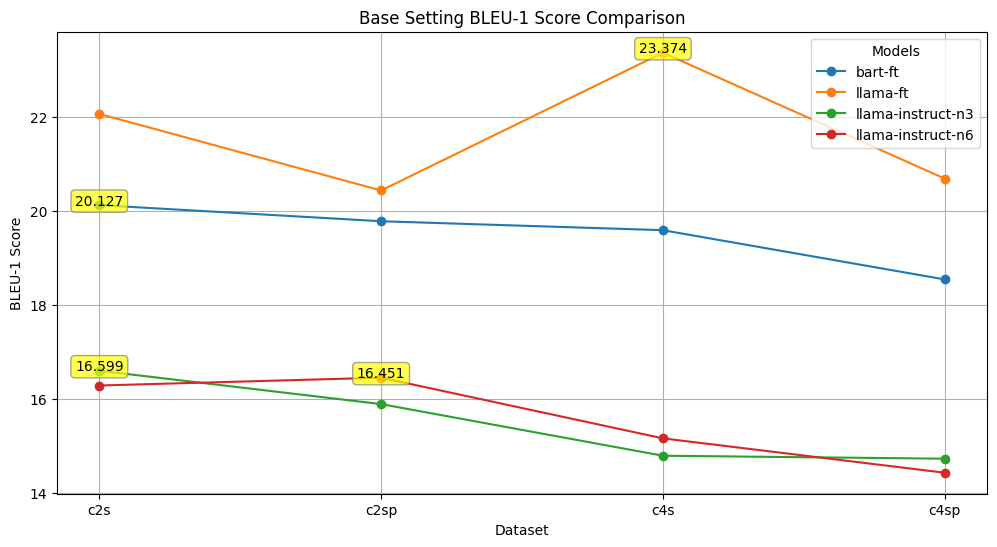

In [3]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    setting="base",
    title="Base Setting BLEU-1 Score Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_base-b1"]
)

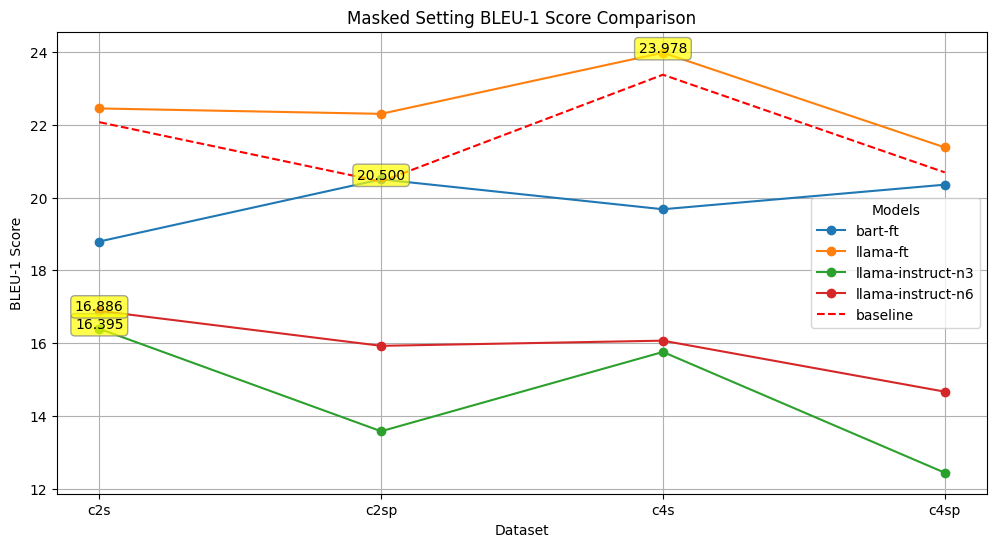

In [3]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    setting='masked',
    title="Masked Setting BLEU-1 Score Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_masked-b1"],
    baseline="llama-ft_base-b1"
)

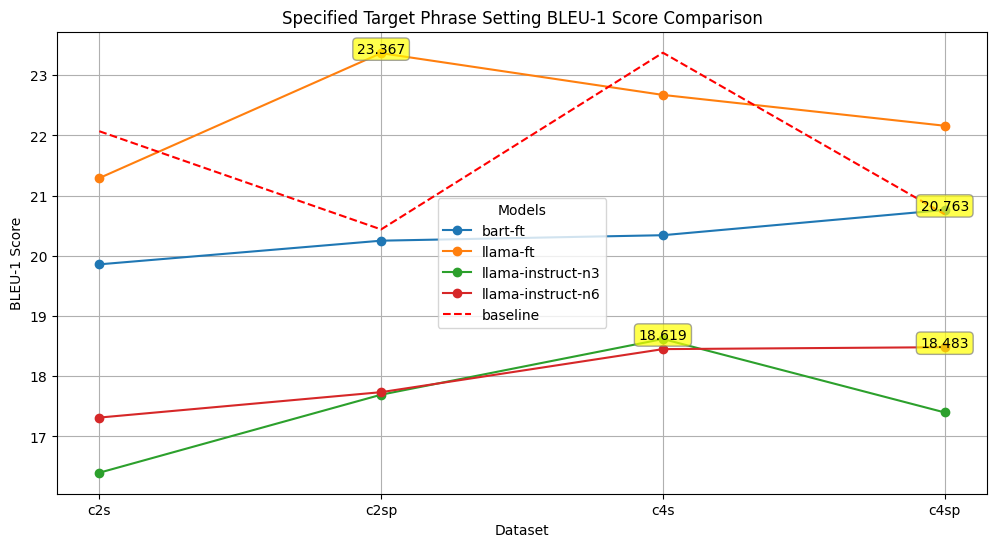

In [4]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    setting="target-phrase",
    title="Specified Target Phrase Setting BLEU-1 Score Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_target-phrase-b1"],
    baseline="llama-ft_base-b1"
)

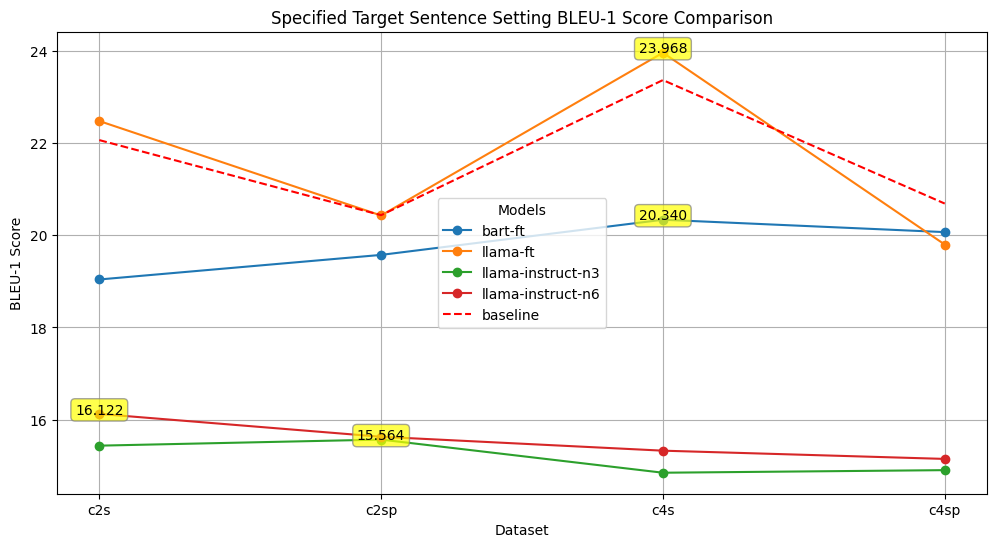

In [5]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    setting='target-sent',
    title="Specified Target Sentence Setting BLEU-1 Score Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_target-sent-b1"],
    baseline="llama-ft_base-b1"
)

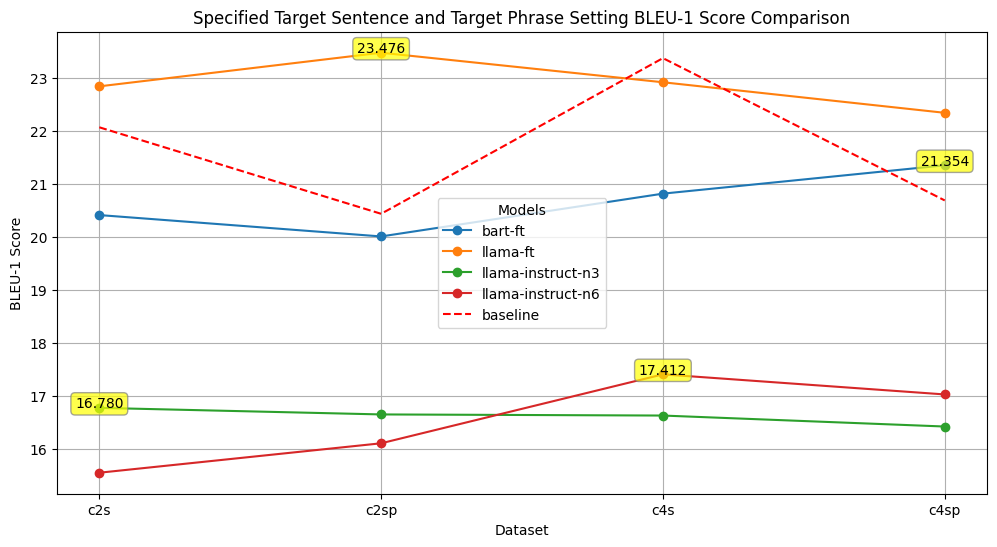

In [6]:
compare_setting(
    dataframe=df,
    score_type="BLEU-1",
    dataset_column='dataset',
    setting='target-sent-target',
    title="Specified Target Sentence and Target Phrase Setting BLEU-1 Score Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_target-sent-target-b1"],
    baseline="llama-ft_base-b1"
)

## BLEU-2 Score

In [7]:
bart_ft_df = preprocess_dataframe(bart_ft_res, "b2", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"b2", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"b2","llama-instr-few-shot")

df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
df.head()

,dataset,bart-ft_base-b2,bart-ft_masked-b2,bart-ft_subject-b2,bart-ft_target-phrase-b2,bart-ft_target-sent-b2,bart-ft_target-sent-target-b2,bart-ft_target-sent-subject-b2,llama-ft_base-b2,llama-ft_masked-b2,...,llama-instr-few-shot_base-n3-b2,llama-instr-few-shot_masked-n3-b2,llama-instr-few-shot_target-phrase-n3-b2,llama-instr-few-shot_target-sent-n3-b2,llama-instr-few-shot_target-sent-target-n3-b2,llama-instr-few-shot_base-n6-b2,llama-instr-few-shot_masked-n6-b2,llama-instr-few-shot_target-phrase-n6-b2,llama-instr-few-shot_target-sent-n6-b2,llama-instr-few-shot_target-sent-target-n6-b2
0,c2s,6.451,4.865,19.002,6.410,5.396,7.295,20.938,9.862,9.638,...,5.412,4.933,4.638,3.697,4.587,5.439,4.509,4.618,4.130,4.471
1,c2sp,6.257,8.371,20.317,7.011,5.308,5.849,21.927,8.020,9.604,...,5.029,3.544,5.964,4.112,4.772,5.631,4.211,4.894,4.294,4.887
2,c4s,6.638,6.381,20.601,7.410,7.652,7.495,21.728,9.504,9.615,...,3.992,4.099,6.920,3.722,4.795,3.637,4.740,6.623,3.810,5.060
3,c4sp,6.585,7.890,19.846,7.967,7.236,9.297,21.634,8.296,8.435,...,3.387,3.373,6.045,4.475,4.694,3.505,3.852,6.339,4.739,4.433
4,c2spo,3.266,NaN,17.341,6.959,3.810,7.722,18.353,5.063,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
find_max_value(df,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"])

Highest score: 10.968
Dataset: c4s
Column: llama-ft_target-phrase-b2


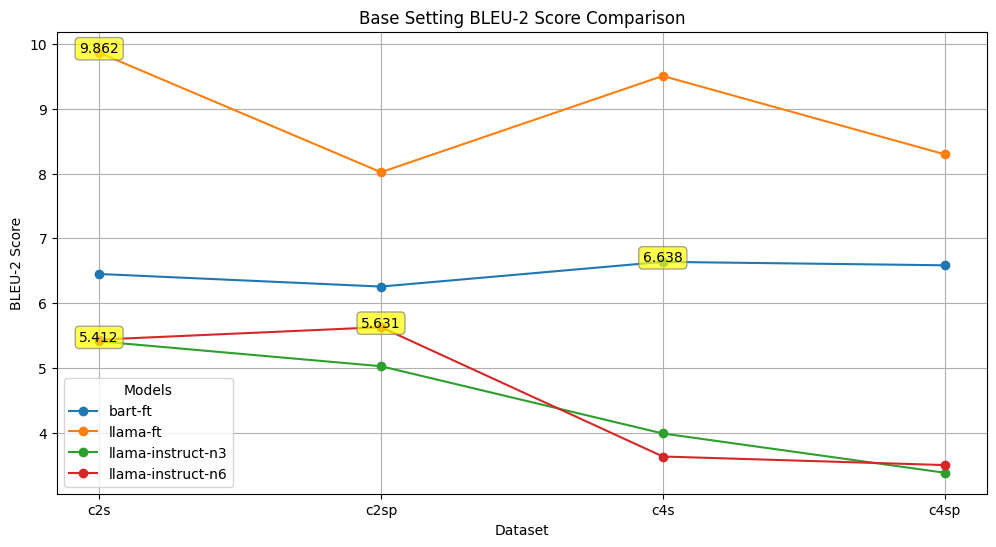

In [8]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    setting='base',
    title="Base Setting BLEU-2 Score Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_base-b2"]
)

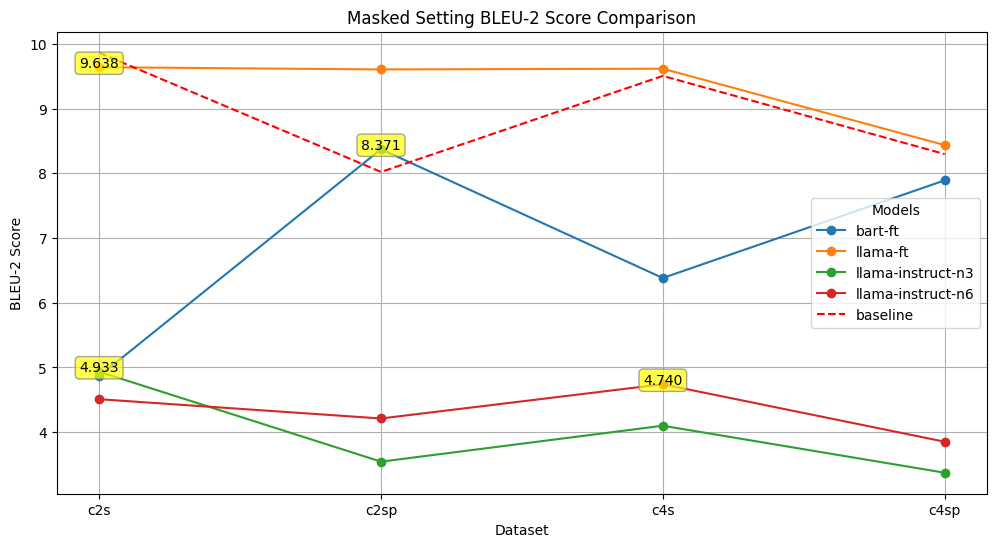

In [11]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    setting='masked',
    title="Masked Setting BLEU-2 Score Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_masked-b2"],
    baseline="llama-ft_base-b2"
)

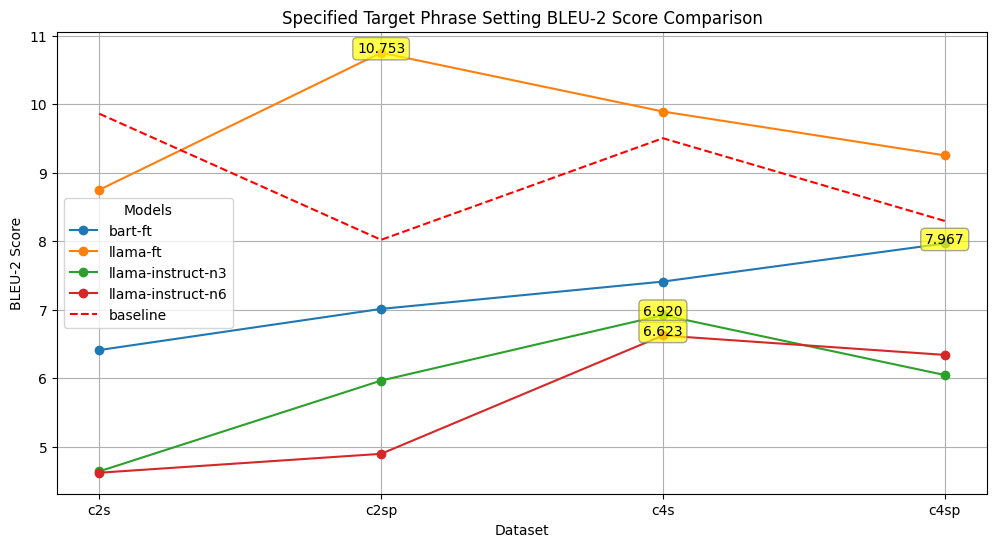

In [8]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    setting='target-phrase',
    title="Specified Target Phrase Setting BLEU-2 Score Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_target-phrase-b2"],
    baseline="llama-ft_base-b2"
    
)

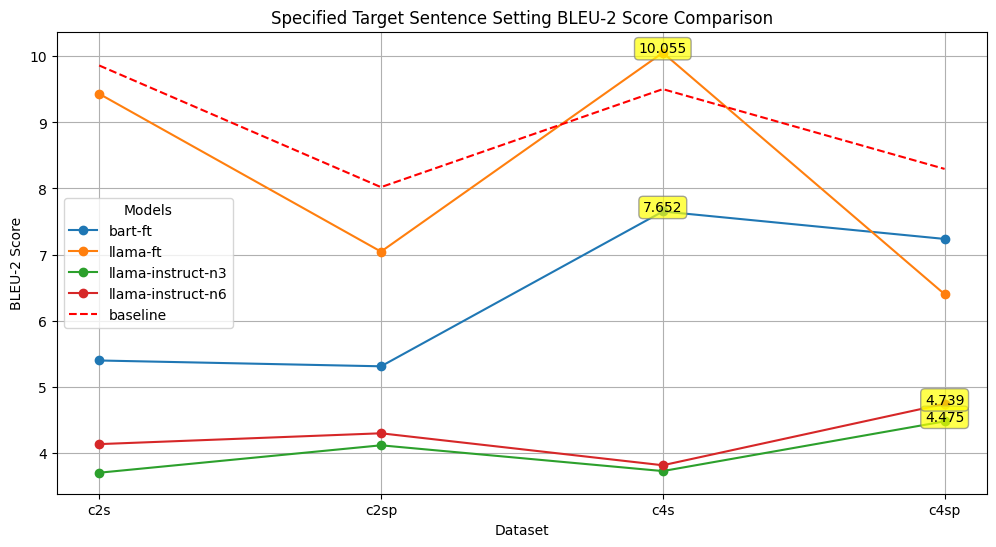

In [9]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    setting='target-sent',
    title="Specified Target Sentence Setting BLEU-2 Score Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_target-sent-b2"],
    baseline="llama-ft_base-b2"
)

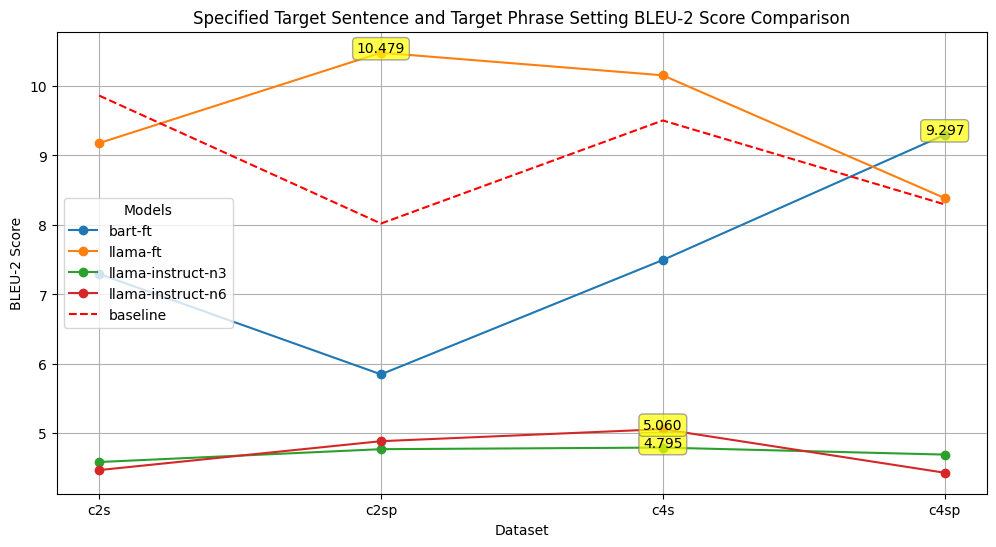

In [10]:
compare_setting(
    dataframe=df,
    score_type="BLEU-2",
    dataset_column='dataset',
    setting='target-sent-target',
    title="Specified Target Sentence and Target Phrase Setting BLEU-2 Score Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_target-sent-target-b2"],
    baseline="llama-ft_base-b2"
)

## BERTScore

In [11]:
bart_ft_df = preprocess_dataframe(bart_ft_res, "bsf1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bsf1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bsf1","llama-instr-few-shot")

df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
df.head()

,dataset,bart-ft_base-bsf1,bart-ft_masked-bsf1,bart-ft_subject-bsf1,bart-ft_target-phrase-bsf1,bart-ft_target-sent-bsf1,bart-ft_target-sent-target-bsf1,bart-ft_target-sent-subject-bsf1,llama-ft_base-bsf1,llama-ft_masked-bsf1,...,llama-instr-few-shot_base-n3-bsf1,llama-instr-few-shot_masked-n3-bsf1,llama-instr-few-shot_target-phrase-n3-bsf1,llama-instr-few-shot_target-sent-n3-bsf1,llama-instr-few-shot_target-sent-target-n3-bsf1,llama-instr-few-shot_base-n6-bsf1,llama-instr-few-shot_masked-n6-bsf1,llama-instr-few-shot_target-phrase-n6-bsf1,llama-instr-few-shot_target-sent-n6-bsf1,llama-instr-few-shot_target-sent-target-n6-bsf1
0,c2s,0.468,0.461,0.559,0.483,0.470,0.490,0.574,0.501,0.503,...,0.453,0.450,0.473,0.454,0.474,0.450,0.447,0.471,0.449,0.464
1,c2sp,0.487,0.489,0.566,0.490,0.485,0.485,0.574,0.482,0.507,...,0.450,0.445,0.485,0.451,0.475,0.445,0.447,0.477,0.445,0.469
2,c4s,0.470,0.471,0.573,0.490,0.485,0.486,0.572,0.499,0.500,...,0.441,0.448,0.485,0.450,0.471,0.440,0.449,0.475,0.448,0.471
3,c4sp,0.470,0.491,0.566,0.504,0.497,0.512,0.568,0.479,0.493,...,0.436,0.438,0.485,0.445,0.472,0.432,0.442,0.491,0.441,0.468
4,c2spo,0.440,NaN,0.559,0.487,0.445,0.492,0.571,0.446,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
find_max_value(df,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"])

Highest score: 0.519
Dataset: c2sp
Column: llama-ft_target-sent-target-bsf1


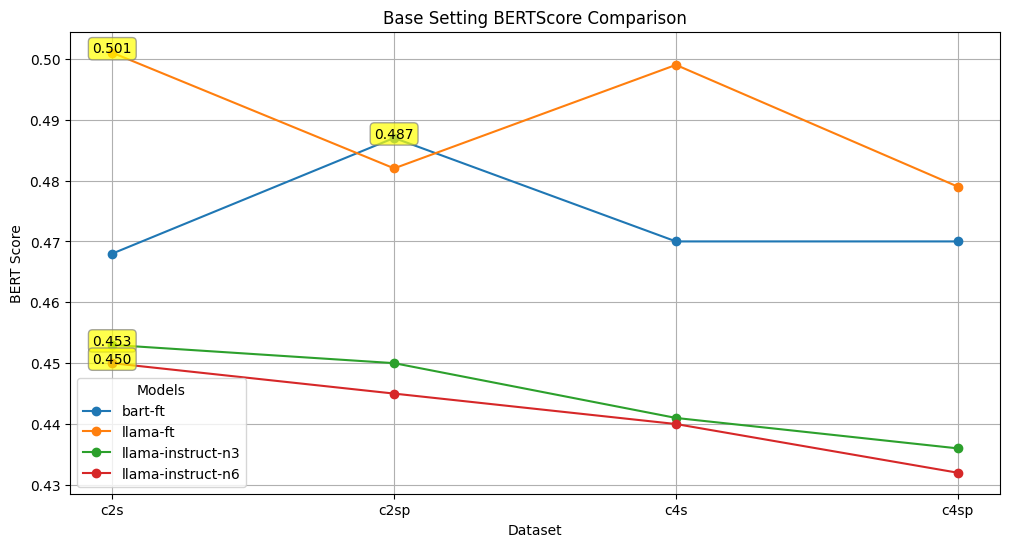

In [13]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    setting='base',
    title="Base Setting BERTScore Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_base-bsf1"]
)

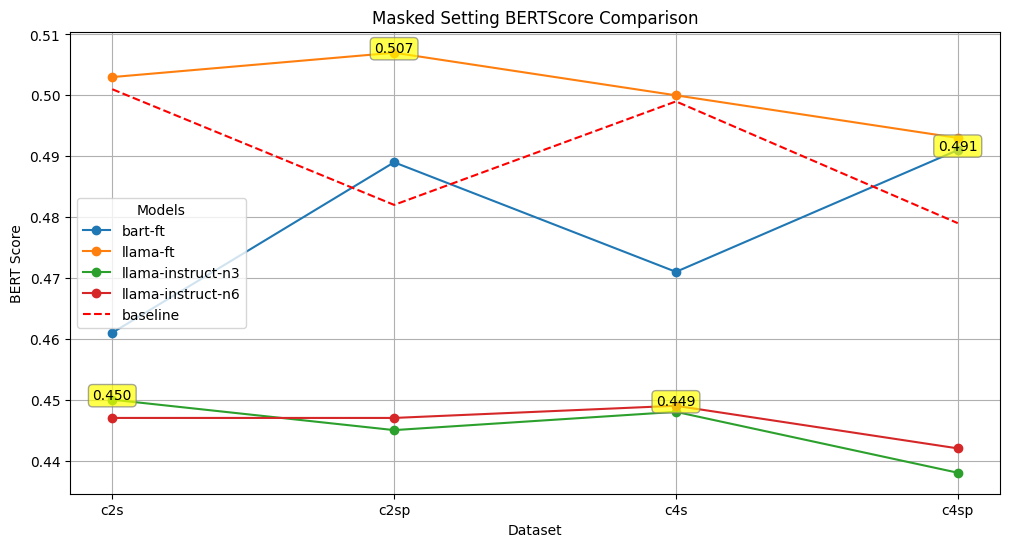

In [17]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    setting='masked',
    title="Masked Setting BERTScore Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_masked-bsf1"],
    baseline="llama-ft_base-bsf1"
)

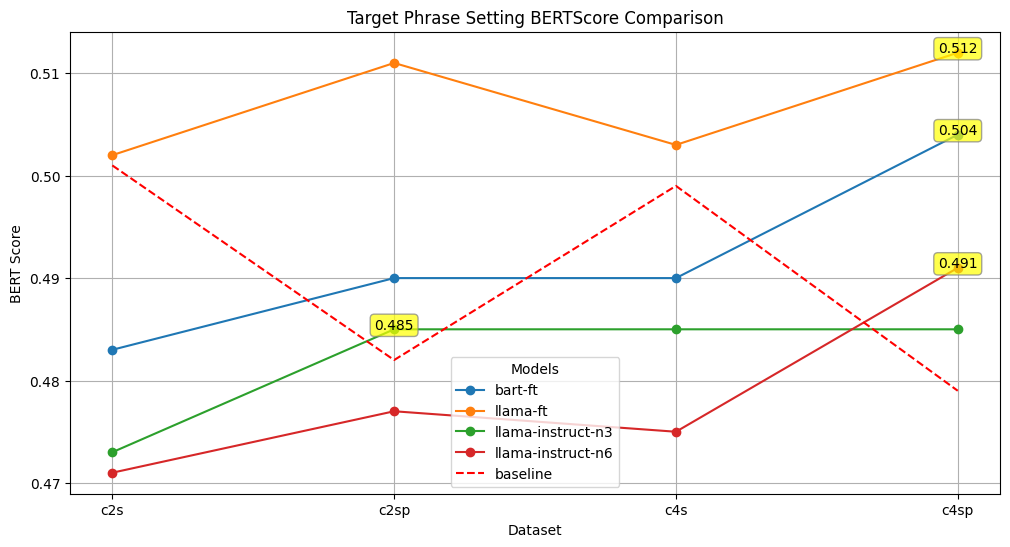

In [14]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    setting='target-phrase',
    title="Target Phrase Setting BERTScore Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_target-phrase-bsf1"],
    baseline="llama-ft_base-bsf1"
    
)

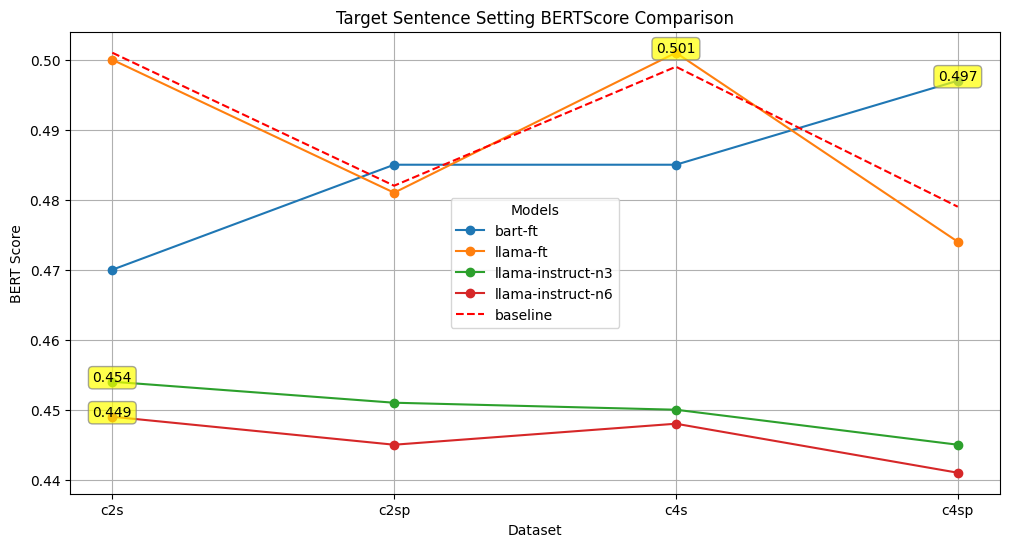

In [15]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    setting='target-sent',
    title="Target Sentence Setting BERTScore Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_target-sent-bsf1"],
    baseline="llama-ft_base-bsf1"
)

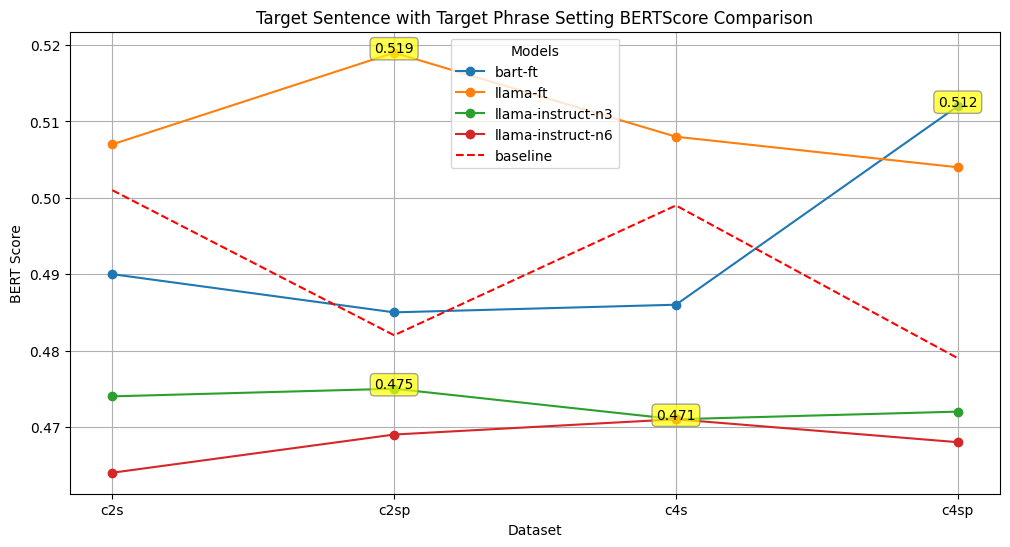

In [16]:
compare_setting(
    dataframe=df,
    score_type="BERT",
    dataset_column='dataset',
    setting='target-sent-target',
    title="Target Sentence with Target Phrase Setting BERTScore Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_target-sent-target-bsf1"],
    baseline="llama-ft_base-bsf1"
)

## BARTScore
https://huggingface.co/posts/santiviquez/809039256258115

In [17]:
bart_ft_df = preprocess_dataframe(bart_ft_res, "bartscore", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bartscore", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bartscore","llama-instr-few-shot")

df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
df.head()

,dataset,bart-ft_base-bartscore,bart-ft_masked-bartscore,bart-ft_subject-bartscore,bart-ft_target-phrase-bartscore,bart-ft_target-sent-bartscore,bart-ft_target-sent-target-bartscore,bart-ft_target-sent-subject-bartscore,llama-ft_base-bartscore,llama-ft_masked-bartscore,...,llama-instr-few-shot_base-n3-bartscore,llama-instr-few-shot_masked-n3-bartscore,llama-instr-few-shot_target-phrase-n3-bartscore,llama-instr-few-shot_target-sent-n3-bartscore,llama-instr-few-shot_target-sent-target-n3-bartscore,llama-instr-few-shot_base-n6-bartscore,llama-instr-few-shot_masked-n6-bartscore,llama-instr-few-shot_target-phrase-n6-bartscore,llama-instr-few-shot_target-sent-n6-bartscore,llama-instr-few-shot_target-sent-target-n6-bartscore
0,c2s,-3.438,-3.465,-2.954,-3.301,-3.382,-3.331,-2.912,-3.328,-3.340,...,-3.875,-3.820,-3.696,-3.818,-3.691,-3.868,-3.813,-3.740,-3.813,-3.736
1,c2sp,-3.406,-3.396,-2.930,-3.335,-3.380,-3.347,-2.876,-3.393,-3.273,...,-3.904,-3.922,-3.618,-3.840,-3.678,-3.917,-3.841,-3.671,-3.868,-3.720
2,c4s,-3.395,-3.396,-2.906,-3.307,-3.321,-3.287,-2.898,-3.344,-3.341,...,-3.927,-3.863,-3.669,-3.865,-3.752,-3.918,-3.844,-3.706,-3.883,-3.773
3,c4sp,-3.386,-3.363,-2.952,-3.299,-3.345,-3.257,-2.892,-3.358,-3.328,...,-4.013,-4.031,-3.620,-3.895,-3.670,-3.968,-3.921,-3.601,-3.930,-3.766
4,c2spo,-3.531,NaN,-3.002,-3.421,-3.590,-3.383,-2.995,-3.517,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
find_max_value(df,exclude_substrings=["subject"])

Highest score: -3.202
Dataset: c2sp
Column: llama-ft_target-phrase-bartscore


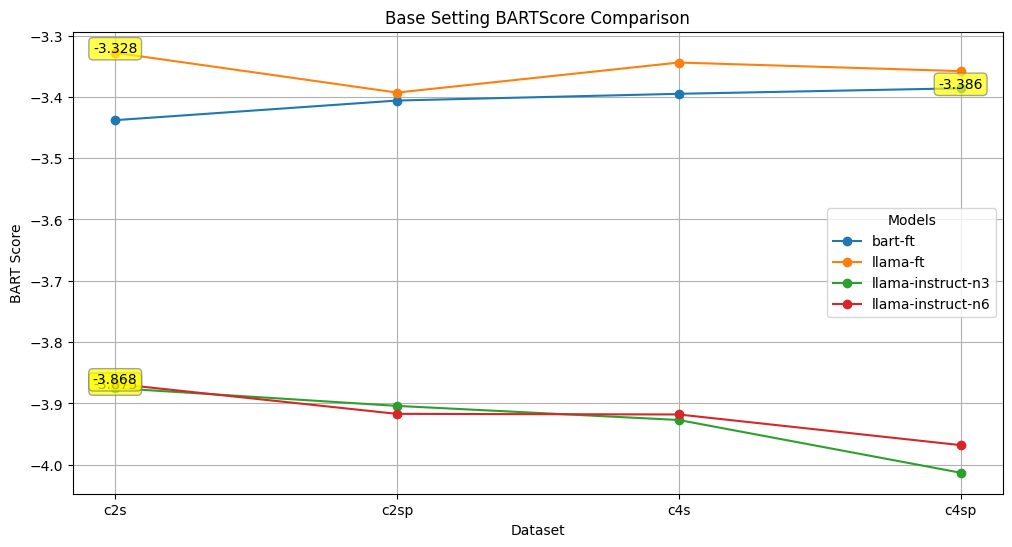

In [19]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    setting='base',
    title="Base Setting BARTScore Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_base-bartscore"]
)

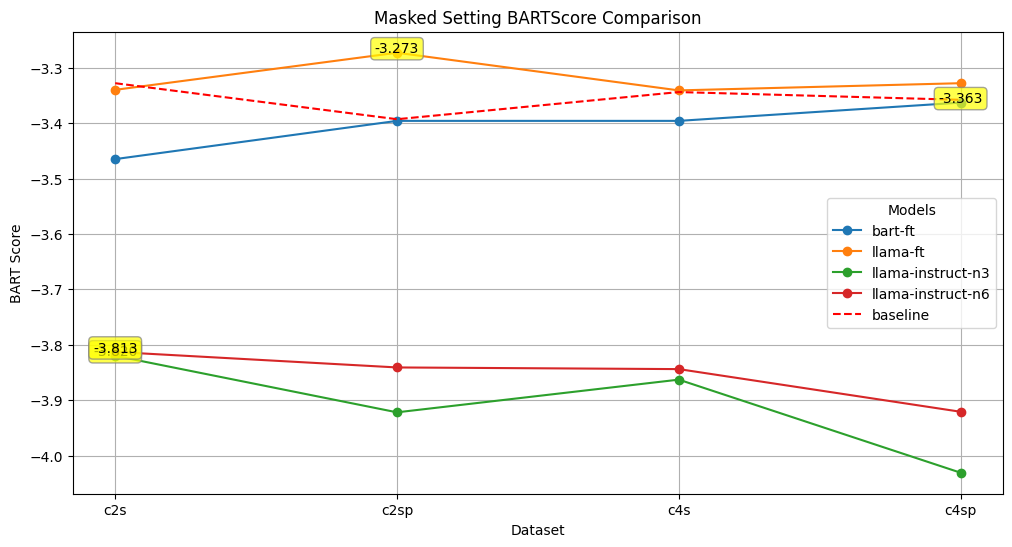

In [22]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    setting='masked',
    title="Masked Setting BARTScore Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_masked-bartscore"],
    baseline="llama-ft_base-bartscore"
)

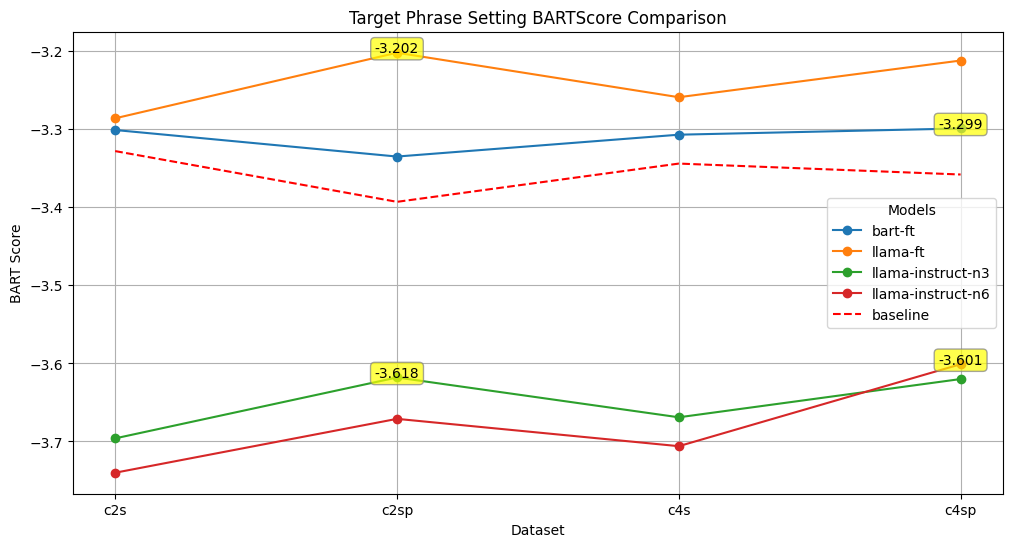

In [19]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    setting='target-phrase',
    title="Target Phrase Setting BARTScore Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_target-phrase-bartscore"],
    baseline="llama-ft_base-bartscore"
)

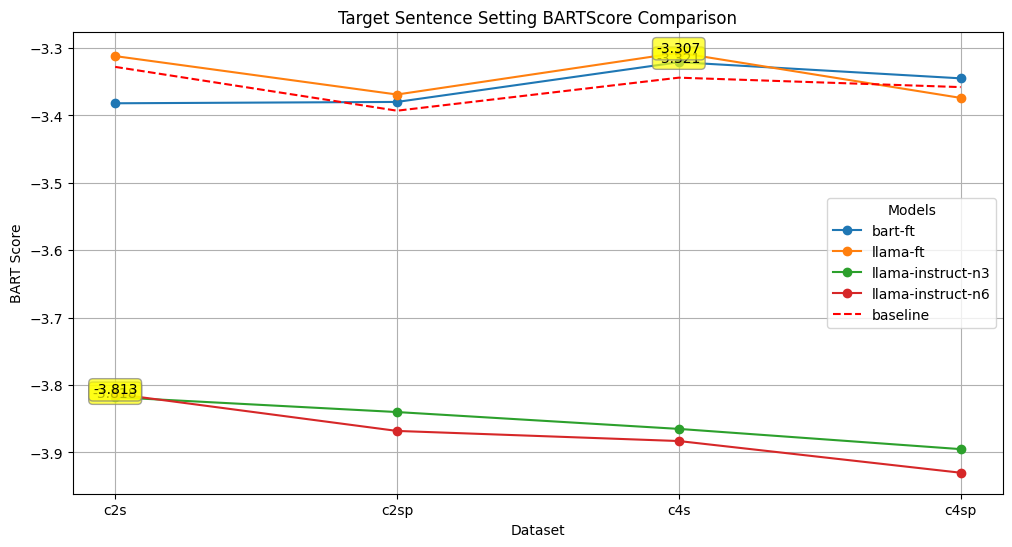

In [20]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    setting='target-sent',
    title="Target Sentence Setting BARTScore Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_target-sent-bartscore"],
    baseline="llama-ft_base-bartscore"
)

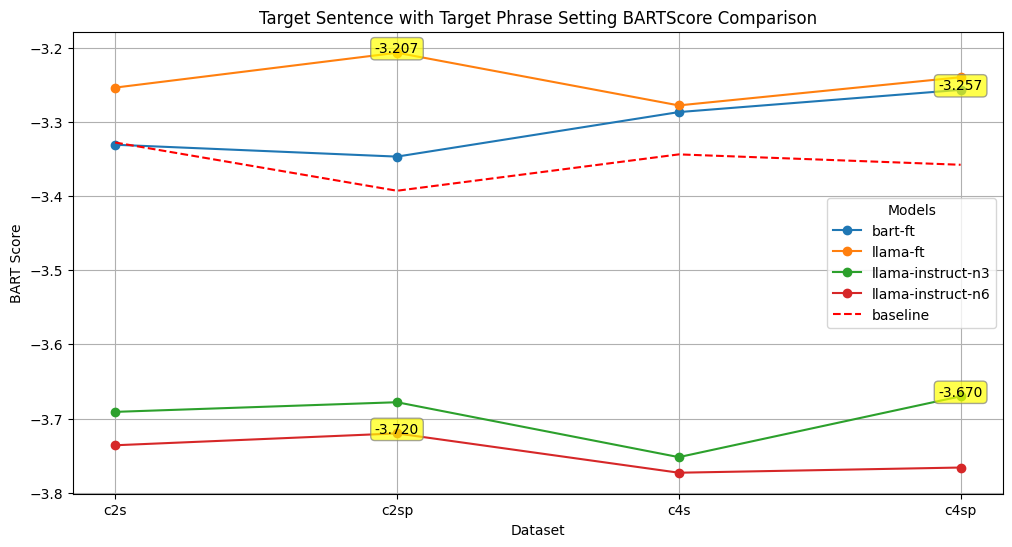

In [21]:
compare_setting(
    dataframe=df,
    score_type="BART",
    dataset_column='dataset',
    setting='target-sent-target',
    title="Target Sentence with Target Phrase Setting BARTScore Comparison",
    exclude_datasets=["c2spo","c4spo","c2o","c2op"],
    exclude_columns=["llama-instr-few-shot_target-sent-target-bartscore"],
    baseline="llama-ft_base-bartscore"
)

# Prompt evaluation

In [2]:
df = llama_instr_prompt_res

## BLEU-1

In [11]:
df_filtered = preprocess_dataframe(llama_instr_prompt_res , "b1", "llama-instr", exclude_substrings=["random","long-valid"])
find_max_value(df_filtered)

Highest score: 16.599
Dataset: c2s
Column: llama-instr_short-n3-b1


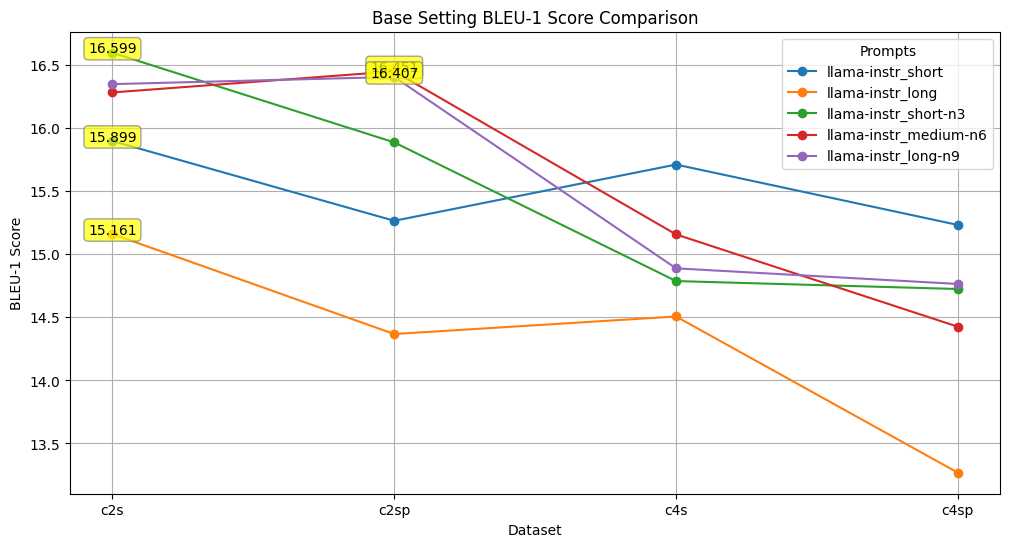

In [12]:
compare_prompt_setting(
    dataframe=df_filtered,
    score_type="BLEU-1",
    dataset_column='dataset',
    column_type='b1',
    title="Base Setting BLEU-1 Score Comparison"
)

## BLEU-2

In [13]:
df_filtered = preprocess_dataframe(llama_instr_prompt_res , "b2", "llama-instr", exclude_substrings=["random","long-valid"])
find_max_value(df_filtered)

Highest score: 5.631
Dataset: c2sp
Column: llama-instr_medium-n6-b2


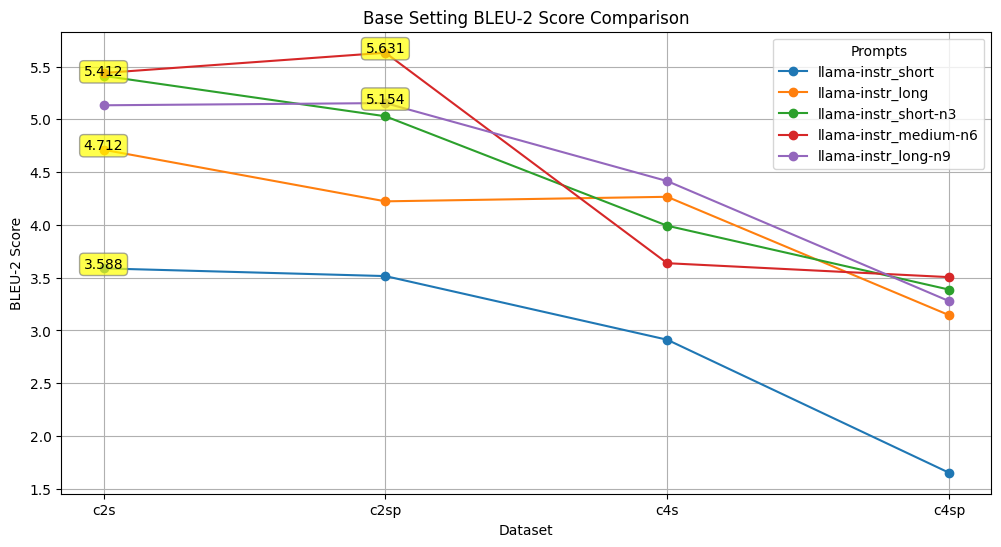

In [15]:
compare_prompt_setting(
    dataframe=df_filtered,
    score_type="BLEU-2",
    dataset_column='dataset',
    column_type='b2',
    title="Base Setting BLEU-2 Score Comparison"
)

## BERTScore

In [16]:
df_filtered = preprocess_dataframe(llama_instr_prompt_res , "bsf1", "llama-instr", exclude_substrings=["random","long-valid"])
find_max_value(df_filtered)

Highest score: 0.475
Dataset: c2s
Column: llama-instr_short-bsf1


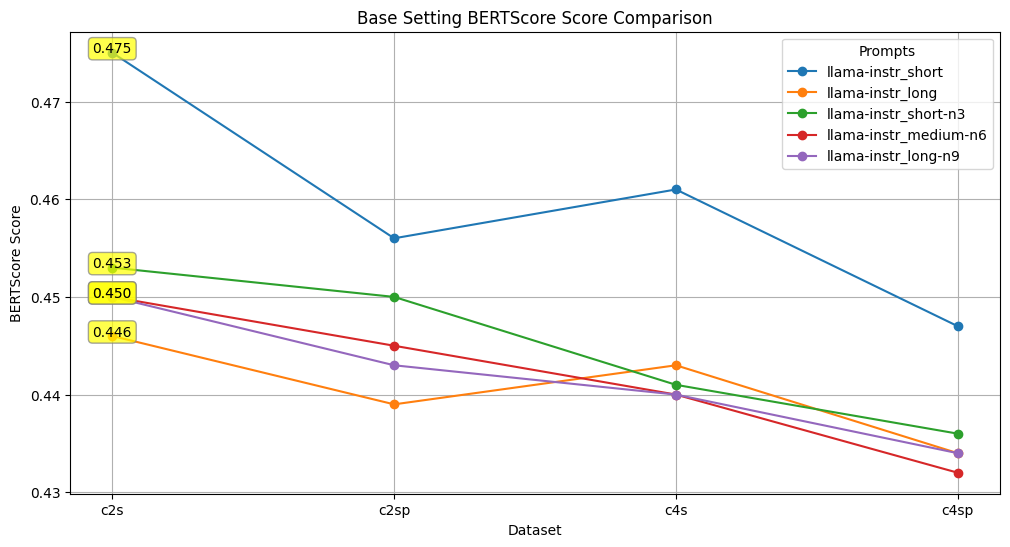

In [17]:
compare_prompt_setting(
    dataframe=df_filtered,
    score_type="BERTScore",
    dataset_column='dataset',
    column_type='bsf1',
    title="Base Setting BERTScore Score Comparison"
)

## BARTScore

In [24]:
df_filtered = preprocess_dataframe(llama_instr_prompt_res , "bartscore", "llama-instr", exclude_substrings=["random","long-valid"])
find_max_value(df_filtered)

Highest score: -3.778
Dataset: c2s
Column: llama-instr_short-bartscore


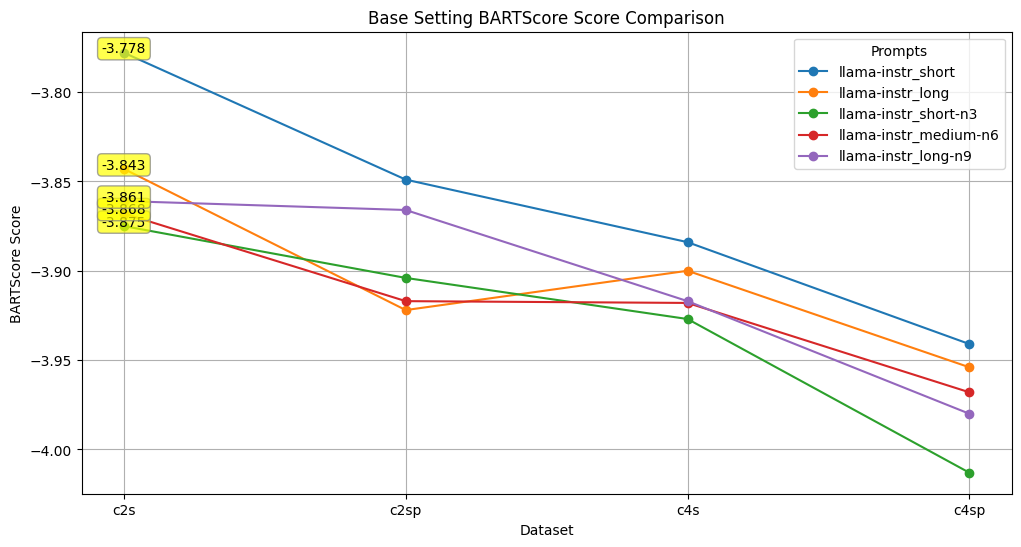

In [25]:
compare_prompt_setting(
    dataframe=df_filtered,
    score_type="BARTScore",
    dataset_column='dataset',
    column_type='bartscore',
    title="Base Setting BARTScore Score Comparison"
)

# Best setting for each model

## BART-ft

In [31]:
find_max_value(bart_ft_res,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"])

Highest score: 21.354
Dataset: c4sp
Column: target-sent-target-b1


In [32]:
find_max_value(bart_ft_res,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"],score_type="bsf1")

Highest score: 0.512
Dataset: c4sp
Column: target-sent-target-bsf1


In [33]:
find_max_value(bart_ft_res,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"],score_type="bartscore")

Highest score: -3.257
Dataset: c4sp
Column: target-sent-target-bartscore


## Llama-ft

In [34]:
find_max_value(llama_ft_res,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"])

Highest score: 23.978
Dataset: c4s
Column: masked-b1


In [35]:
find_max_value(llama_ft_res,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"],score_type="bsf1")

Highest score: 0.519
Dataset: c2sp
Column: target-sent-target-bsf1


In [36]:
find_max_value(llama_ft_res,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"],score_type="bartscore")

Highest score: -3.202
Dataset: c2sp
Column: target-phrase-bartscore


## Llama-instruct

In [37]:
find_max_value(llama_instr_res,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"])

Highest score: 19.185
Dataset: c2sp
Column: target-phrase-b1


In [38]:
find_max_value(llama_instr_res,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"],score_type="bsf1")

Highest score: 0.499
Dataset: c4sp
Column: target-phrase-bsf1


In [39]:
find_max_value(llama_instr_res,exclude_substrings=["subject"],exclude_datasets=["c2op","c2o"],score_type="bartscore")

Highest score: -3.453
Dataset: c4sp
Column: target-phrase-bartscore


### Prompt

In [16]:
find_max_value(llama_instr_prompt_res,exclude_substrings=["long-valid-b1"],exclude_datasets=["c2op","c2o"])

Highest score: 16.599
Dataset: c2s
Column: short-n3-b1


In [10]:
find_max_value(llama_instr_prompt_res,exclude_substrings=["long-valid-b1"],exclude_datasets=["c2op","c2o"],score_type="bsf1")

Highest score: 0.475
Dataset: c2s
Column: short-bsf1


In [11]:
find_max_value(llama_instr_prompt_res,exclude_substrings=["long-valid-b1"],exclude_datasets=["c2op","c2o"],score_type="bartscore")

Highest score: -3.778
Dataset: c2s
Column: short-bartscore


# Effectiveness of each setting for all models

## Masked

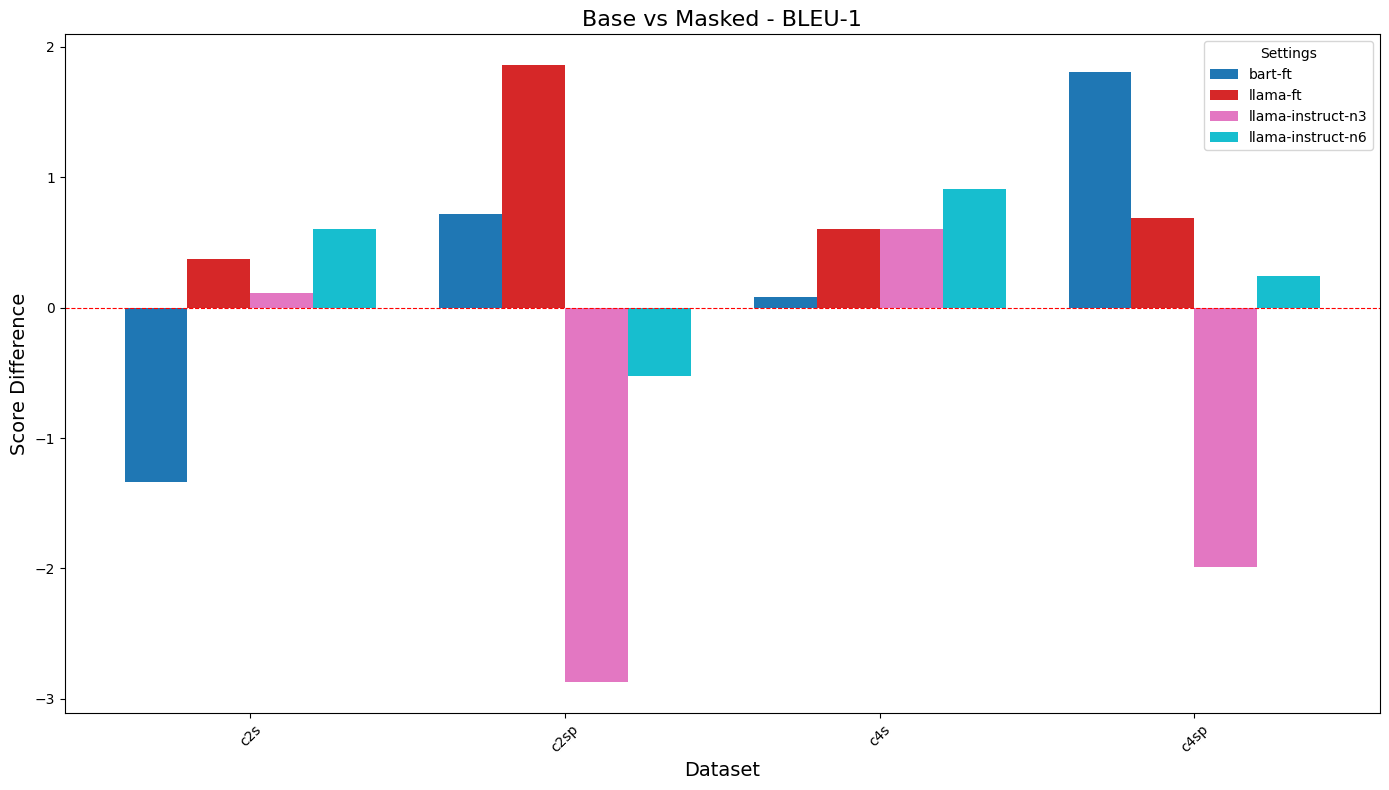

,dataset,bart-ft_base-b1,llama-ft_base-b1,llama-instr-few-shot_base-b1,llama-instr-few-shot_base-n3-b1,llama-instr-few-shot_base-n6-b1,bart-ft_masked-b1,llama-ft_masked-b1,llama-instr-few-shot_masked-n3-b1,llama-instr-few-shot_masked-n6-b1,Difference_bart-ft_masked-b1,Difference_llama-ft_masked-b1,Difference_llama-instr-few-shot_masked-n3-b1,Difference_llama-instr-few-shot_masked-n6-b1
0,c2s,20.127,22.070,15.899,16.599,16.284,18.792,22.447,16.395,16.886,-1.335,0.377,0.111,0.602
1,c2sp,19.784,20.439,15.266,15.888,16.451,20.500,22.299,13.579,15.926,0.716,1.860,-2.872,-0.525
2,c4s,19.593,23.374,15.712,14.788,15.158,19.678,23.978,15.758,16.068,0.085,0.604,0.600,0.910
3,c4sp,18.544,20.691,15.233,14.725,14.426,20.353,21.377,12.440,14.667,1.809,0.686,-1.986,0.241


In [86]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "b1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"b1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"b1","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['masked'],  
    score_type='b1',
    title="Base vs Masked - BLEU-1",
    exclude_columns=["llama-instr-few-shot_masked-b1"]
)

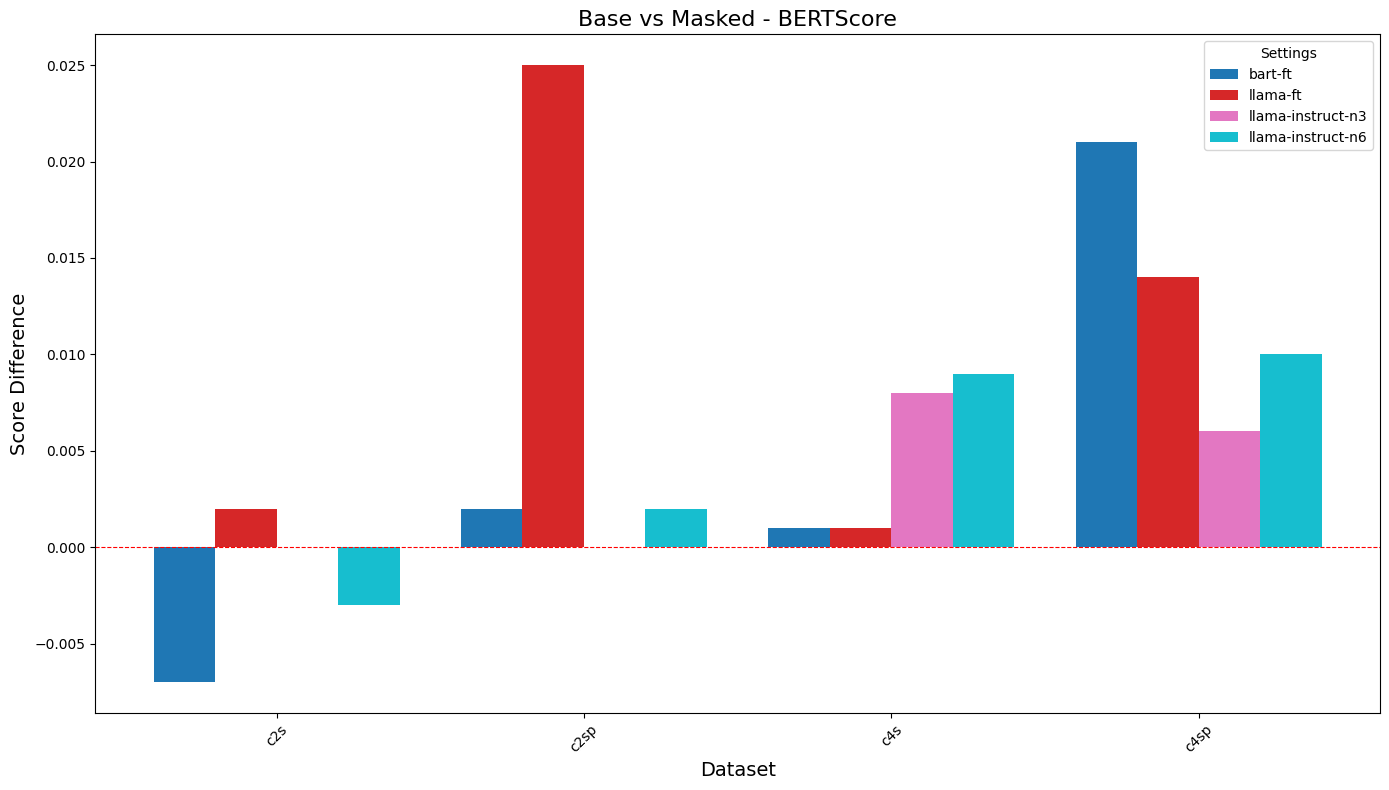

,dataset,bart-ft_base-bsf1,llama-ft_base-bsf1,llama-instr-few-shot_base-bsf1,llama-instr-few-shot_base-n3-bsf1,llama-instr-few-shot_base-n6-bsf1,bart-ft_masked-bsf1,llama-ft_masked-bsf1,llama-instr-few-shot_masked-n3-bsf1,llama-instr-few-shot_masked-n6-bsf1,Difference_bart-ft_masked-bsf1,Difference_llama-ft_masked-bsf1,Difference_llama-instr-few-shot_masked-n3-bsf1,Difference_llama-instr-few-shot_masked-n6-bsf1
0,c2s,0.468,0.501,0.475,0.453,0.450,0.461,0.503,0.450,0.447,-0.007,0.002,0.000,-0.003
1,c2sp,0.487,0.482,0.456,0.450,0.445,0.489,0.507,0.445,0.447,0.002,0.025,0.000,0.002
2,c4s,0.470,0.499,0.461,0.441,0.440,0.471,0.500,0.448,0.449,0.001,0.001,0.008,0.009
3,c4sp,0.470,0.479,0.447,0.436,0.432,0.491,0.493,0.438,0.442,0.021,0.014,0.006,0.010


In [87]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "bsf1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bsf1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bsf1","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
compare_to_base(
    df=df,
    settings_to_compare=['masked'],  
    score_type='bsf1',
    title="Base vs Masked - BERTScore",
    exclude_columns=["llama-instr-few-shot_masked-bsf1"]
)

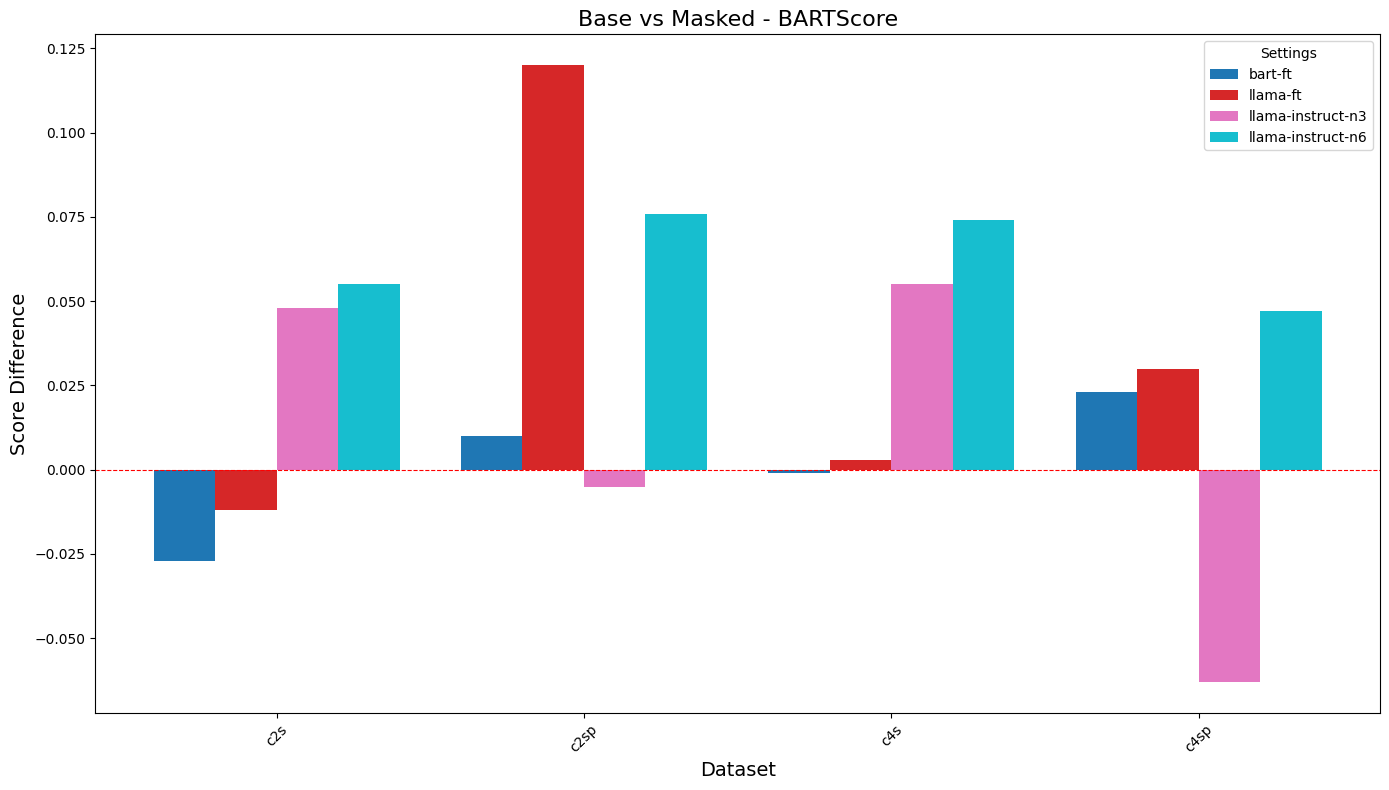

,dataset,bart-ft_base-bartscore,llama-ft_base-bartscore,llama-instr-few-shot_base-bartscore,llama-instr-few-shot_base-n3-bartscore,llama-instr-few-shot_base-n6-bartscore,bart-ft_masked-bartscore,llama-ft_masked-bartscore,llama-instr-few-shot_masked-n3-bartscore,llama-instr-few-shot_masked-n6-bartscore,Difference_bart-ft_masked-bartscore,Difference_llama-ft_masked-bartscore,Difference_llama-instr-few-shot_masked-n3-bartscore,Difference_llama-instr-few-shot_masked-n6-bartscore
0,c2s,-3.438,-3.328,-3.778,-3.875,-3.868,-3.465,-3.340,-3.820,-3.813,-0.027,-0.012,0.048,0.055
1,c2sp,-3.406,-3.393,-3.849,-3.904,-3.917,-3.396,-3.273,-3.922,-3.841,0.010,0.120,-0.005,0.076
2,c4s,-3.395,-3.344,-3.884,-3.927,-3.918,-3.396,-3.341,-3.863,-3.844,-0.001,0.003,0.055,0.074
3,c4sp,-3.386,-3.358,-3.941,-4.013,-3.968,-3.363,-3.328,-4.031,-3.921,0.023,0.030,-0.063,0.047


In [88]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "bartscore", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bartscore", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bartscore","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])
compare_to_base(
    df=df,
    settings_to_compare=['masked'],  
    score_type='bartscore',
    title="Base vs Masked - BARTScore",
    exclude_columns=["llama-instr-few-shot_masked-bartscore"]
)

## Target phrase

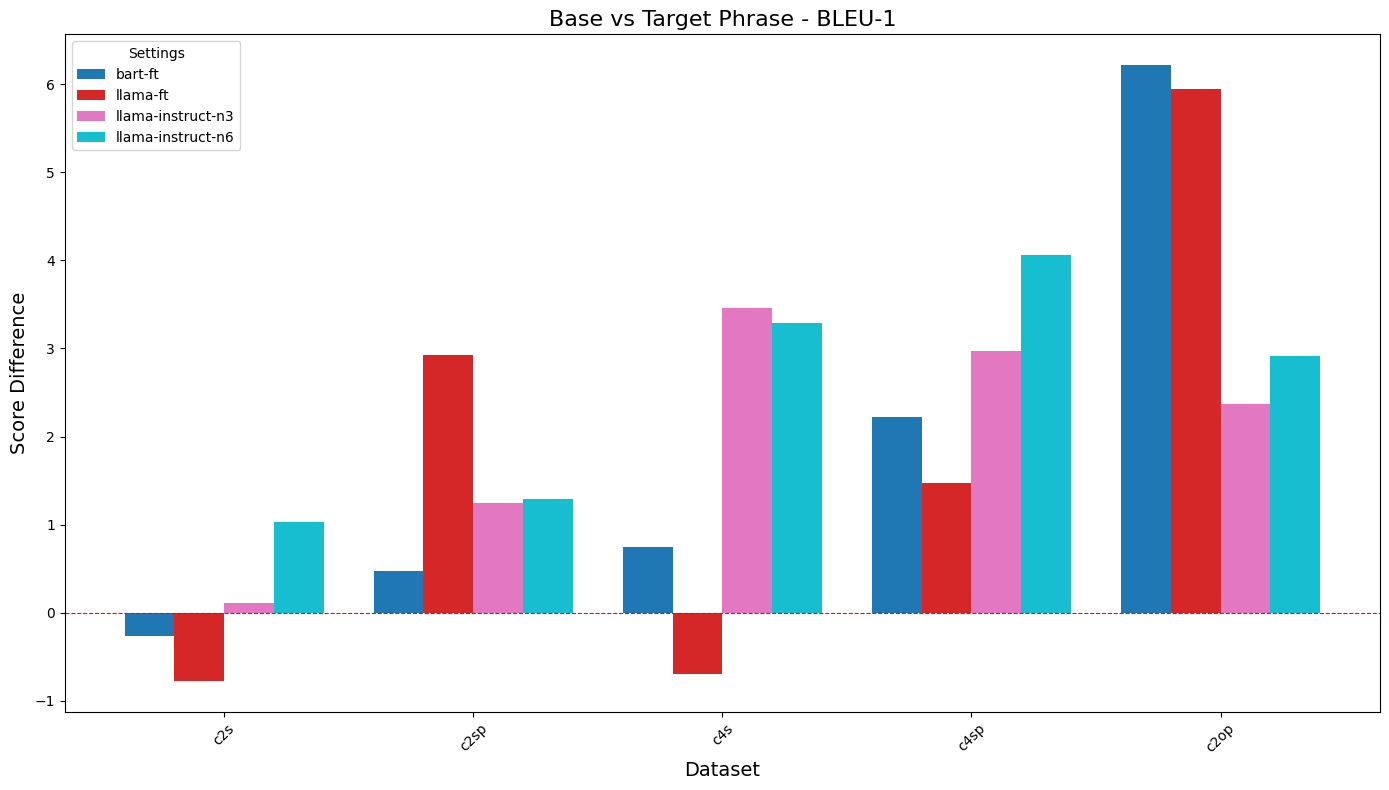

,dataset,bart-ft_base-b1,llama-ft_base-b1,llama-instr-few-shot_base-b1,llama-instr-few-shot_base-n3-b1,llama-instr-few-shot_base-n6-b1,bart-ft_target-phrase-b1,llama-ft_target-phrase-b1,llama-instr-few-shot_target-phrase-n3-b1,llama-instr-few-shot_target-phrase-n6-b1,Difference_bart-ft_target-phrase-b1,Difference_llama-ft_target-phrase-b1,Difference_llama-instr-few-shot_target-phrase-n3-b1,Difference_llama-instr-few-shot_target-phrase-n6-b1
0,c2s,20.127,22.070,15.899,16.599,16.284,19.859,21.292,16.398,17.314,-0.268,-0.778,0.114,1.030
1,c2sp,19.784,20.439,15.266,15.888,16.451,20.252,23.367,17.694,17.736,0.468,2.928,1.243,1.285
2,c4s,19.593,23.374,15.712,14.788,15.158,20.343,22.673,18.619,18.451,0.750,-0.701,3.461,3.293
3,c4sp,18.544,20.691,15.233,14.725,14.426,20.763,22.161,17.399,18.483,2.219,1.470,2.973,4.057
6,c2op,18.676,16.604,13.401,12.324,13.407,24.893,22.555,15.777,16.320,6.217,5.951,2.370,2.913


In [23]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "b1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"b1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"b1","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['target-phrase'],  
    score_type='b1',
    title="Base vs Target Phrase - BLEU-1",
    exclude_columns=["llama-instr-few-shot_target-phrase-b1"]
)

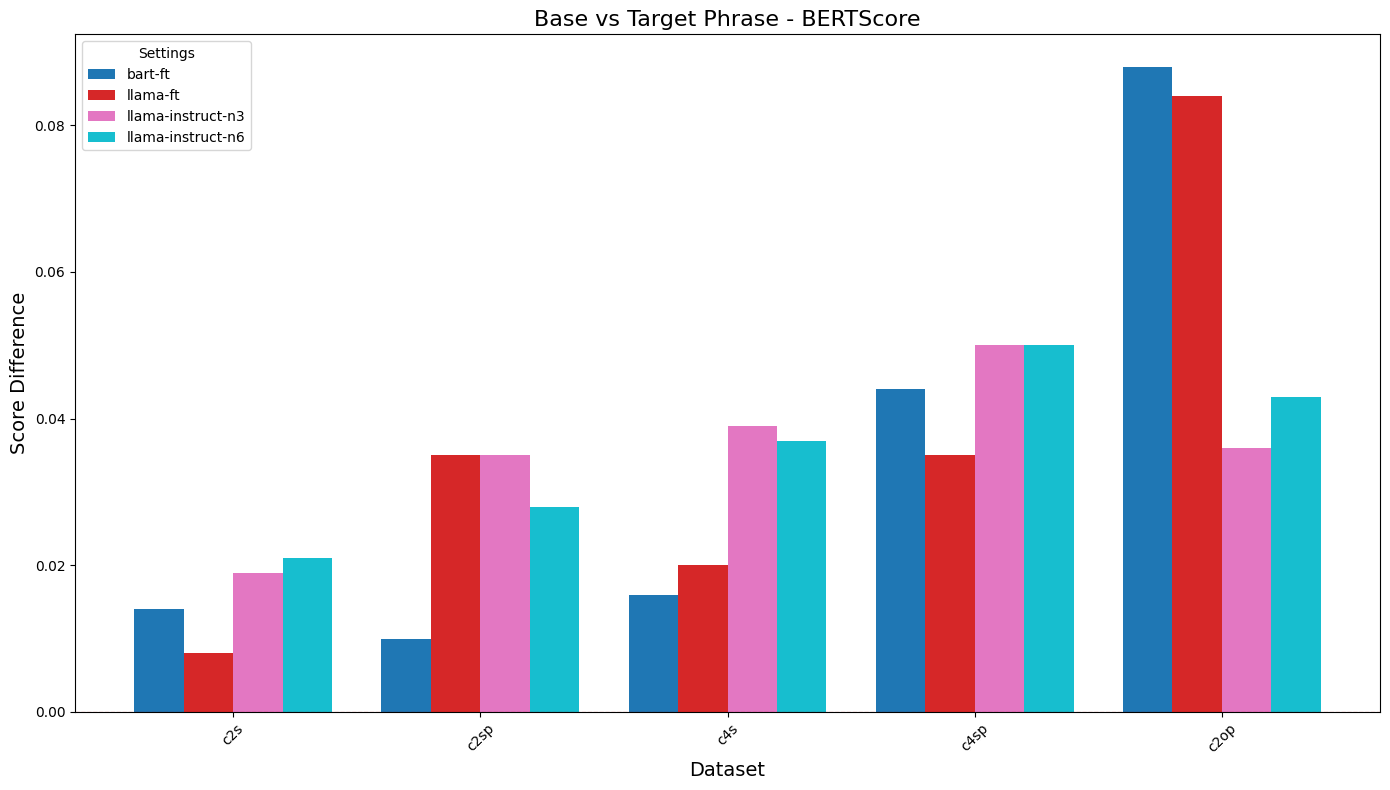

,dataset,bart-ft_base-bsf1,llama-ft_base-bsf1,llama-instr-few-shot_base-bsf1,llama-instr-few-shot_base-n3-bsf1,llama-instr-few-shot_base-n6-bsf1,bart-ft_target-phrase-bsf1,llama-ft_target-phrase-bsf1,llama-instr-few-shot_target-phrase-n3-bsf1,llama-instr-few-shot_target-phrase-n6-bsf1,Difference_bart-ft_target-phrase-bsf1,Difference_llama-ft_target-phrase-bsf1,Difference_llama-instr-few-shot_target-phrase-n3-bsf1,Difference_llama-instr-few-shot_target-phrase-n6-bsf1
0,c2s,0.468,0.501,0.475,0.453,0.450,0.482,0.509,0.469,0.471,0.014,0.008,0.019,0.021
1,c2sp,0.487,0.482,0.456,0.450,0.445,0.497,0.517,0.480,0.473,0.010,0.035,0.035,0.028
2,c4s,0.470,0.499,0.461,0.441,0.440,0.486,0.519,0.479,0.477,0.016,0.020,0.039,0.037
3,c4sp,0.470,0.479,0.447,0.436,0.432,0.514,0.514,0.482,0.482,0.044,0.035,0.050,0.050
6,c2op,0.449,0.435,0.433,0.424,0.428,0.537,0.519,0.464,0.471,0.088,0.084,0.036,0.043


In [92]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "bsf1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bsf1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bsf1","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['target-phrase'],  
    score_type='bsf1',
    title="Base vs Target Phrase - BERTScore",
    exclude_columns=["llama-instr-few-shot_target-phrase-bsf1"]
)

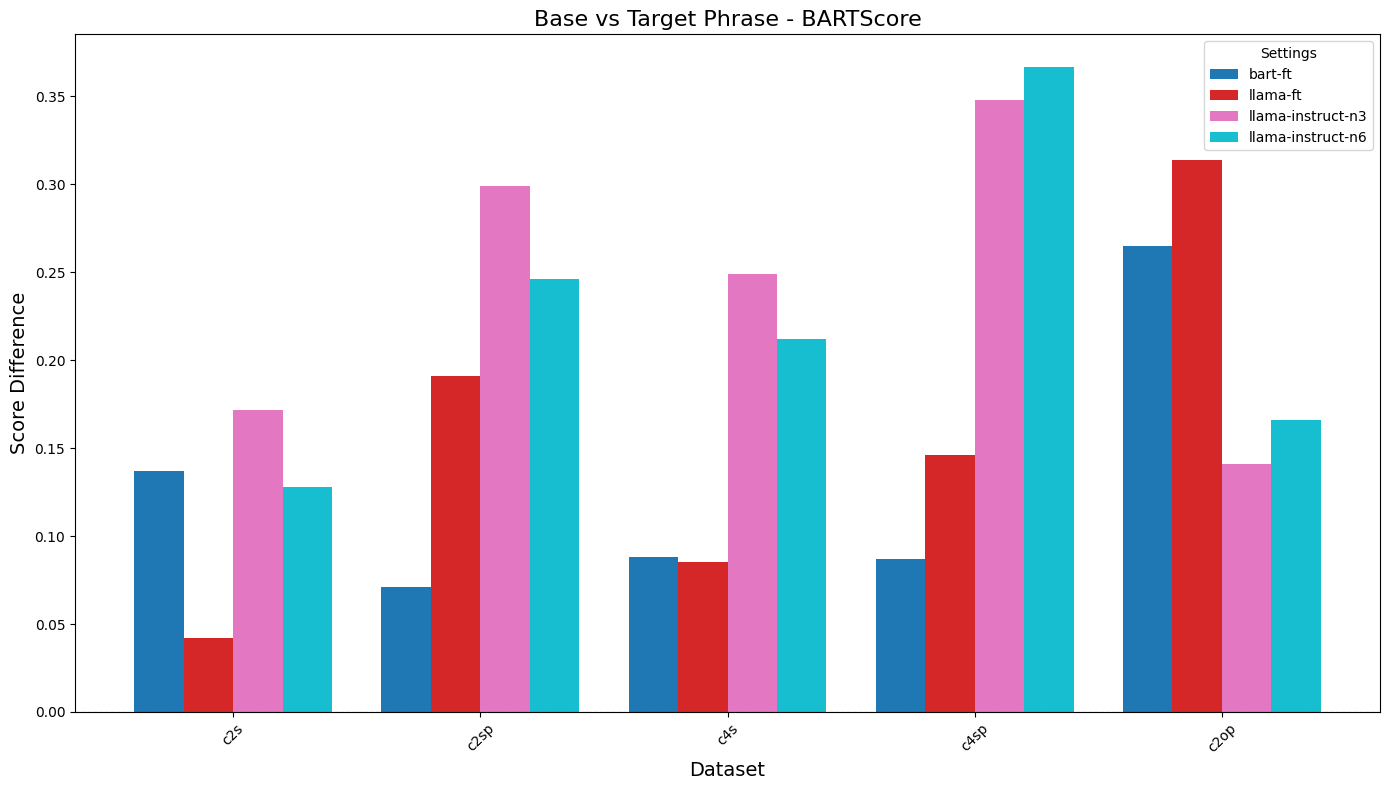

,dataset,bart-ft_base-bartscore,llama-ft_base-bartscore,llama-instr-few-shot_base-bartscore,llama-instr-few-shot_base-n3-bartscore,llama-instr-few-shot_base-n6-bartscore,bart-ft_target-phrase-bartscore,llama-ft_target-phrase-bartscore,llama-instr-few-shot_target-phrase-n3-bartscore,llama-instr-few-shot_target-phrase-n6-bartscore,Difference_bart-ft_target-phrase-bartscore,Difference_llama-ft_target-phrase-bartscore,Difference_llama-instr-few-shot_target-phrase-n3-bartscore,Difference_llama-instr-few-shot_target-phrase-n6-bartscore
0,c2s,-3.438,-3.328,-3.778,-3.875,-3.868,-3.301,-3.286,-3.696,-3.740,0.137,0.042,0.172,0.128
1,c2sp,-3.406,-3.393,-3.849,-3.904,-3.917,-3.335,-3.202,-3.618,-3.671,0.071,0.191,0.299,0.246
2,c4s,-3.395,-3.344,-3.884,-3.927,-3.918,-3.307,-3.259,-3.669,-3.706,0.088,0.085,0.249,0.212
3,c4sp,-3.386,-3.358,-3.941,-4.013,-3.968,-3.299,-3.212,-3.620,-3.601,0.087,0.146,0.348,0.367
6,c2op,-3.543,-3.579,-4.097,-4.162,-4.058,-3.278,-3.265,-3.917,-3.892,0.265,0.314,0.141,0.166


In [24]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "bartscore", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bartscore", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bartscore","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['target-phrase'],  
    score_type='bartscore',
    title="Base vs Target Phrase - BARTScore",
    exclude_columns=["llama-instr-few-shot_target-phrase-bartscore"]
)

## Target Sentence

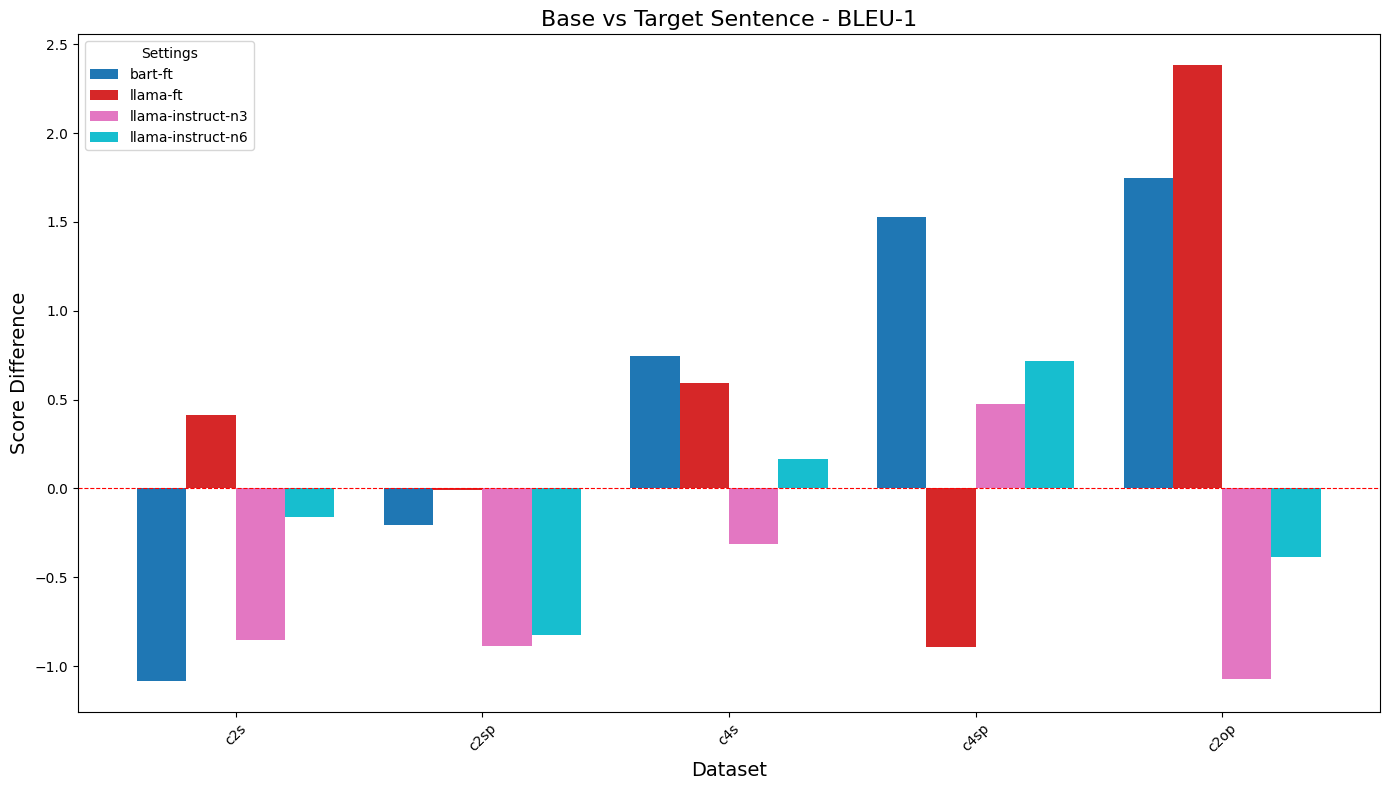

,dataset,bart-ft_base-b1,llama-ft_base-b1,llama-instr-few-shot_base-b1,llama-instr-few-shot_base-n3-b1,llama-instr-few-shot_base-n6-b1,bart-ft_target-sent-b1,llama-ft_target-sent-b1,llama-instr-few-shot_target-sent-n3-b1,llama-instr-few-shot_target-sent-n6-b1,Difference_bart-ft_target-sent-b1,Difference_llama-ft_target-sent-b1,Difference_llama-instr-few-shot_target-sent-n3-b1,Difference_llama-instr-few-shot_target-sent-n6-b1
0,c2s,20.127,22.070,15.899,16.599,16.284,19.042,22.484,15.432,16.122,-1.085,0.414,-0.852,-0.162
1,c2sp,19.784,20.439,15.266,15.888,16.451,19.576,20.432,15.564,15.625,-0.208,-0.007,-0.887,-0.826
2,c4s,19.593,23.374,15.712,14.788,15.158,20.340,23.968,14.844,15.323,0.747,0.594,-0.314,0.165
3,c4sp,18.544,20.691,15.233,14.725,14.426,20.071,19.801,14.900,15.144,1.527,-0.890,0.474,0.718
6,c2op,18.676,16.604,13.401,12.324,13.407,20.421,18.987,12.336,13.021,1.745,2.383,-1.071,-0.386


In [25]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "b1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"b1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"b1","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['target-sent'],  
    score_type='b1',
    title="Base vs Target Sentence - BLEU-1",
    exclude_columns=["llama-instr-few-shot_target-sent-b1"]
)

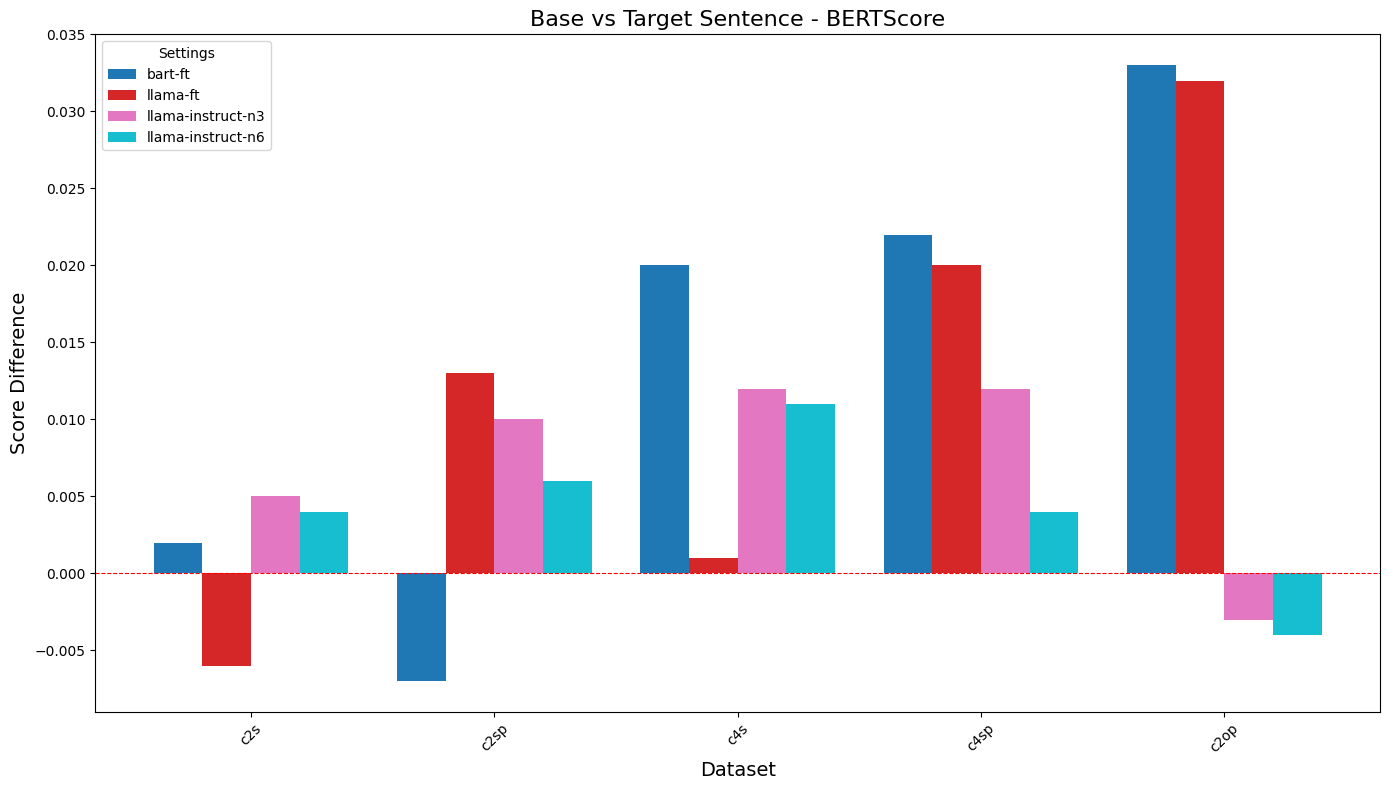

,dataset,bart-ft_base-bsf1,llama-ft_base-bsf1,llama-instr-few-shot_base-bsf1,llama-instr-few-shot_base-n3-bsf1,llama-instr-few-shot_base-n6-bsf1,bart-ft_target-sent-bsf1,llama-ft_target-sent-bsf1,llama-instr-few-shot_target-sent-n3-bsf1,llama-instr-few-shot_target-sent-n6-bsf1,Difference_bart-ft_target-sent-bsf1,Difference_llama-ft_target-sent-bsf1,Difference_llama-instr-few-shot_target-sent-n3-bsf1,Difference_llama-instr-few-shot_target-sent-n6-bsf1
0,c2s,0.468,0.501,0.475,0.453,0.450,0.470,0.495,0.455,0.454,0.002,-0.006,0.005,0.004
1,c2sp,0.487,0.482,0.456,0.450,0.445,0.480,0.495,0.455,0.451,-0.007,0.013,0.010,0.006
2,c4s,0.470,0.499,0.461,0.441,0.440,0.490,0.500,0.452,0.451,0.020,0.001,0.012,0.011
3,c4sp,0.470,0.479,0.447,0.436,0.432,0.492,0.499,0.444,0.436,0.022,0.020,0.012,0.004
6,c2op,0.449,0.435,0.433,0.424,0.428,0.482,0.467,0.425,0.424,0.033,0.032,-0.003,-0.004


In [105]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "bsf1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bsf1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bsf1","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['target-sent'],  
    score_type='bsf1',
    title="Base vs Target Sentence - BERTScore",
    exclude_columns=["llama-instr-few-shot_target-sent-bsf1"]
)

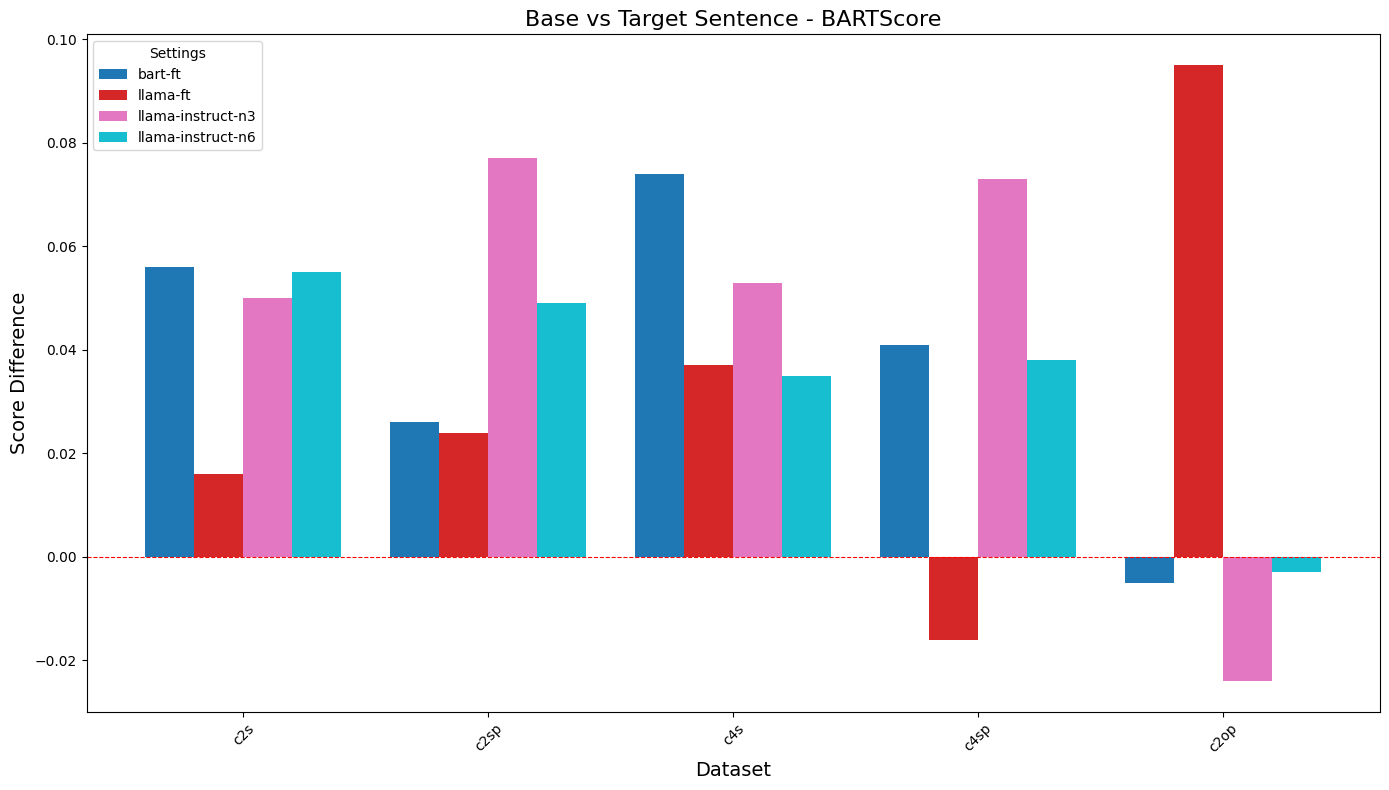

,dataset,bart-ft_base-bartscore,llama-ft_base-bartscore,llama-instr-few-shot_base-bartscore,llama-instr-few-shot_base-n3-bartscore,llama-instr-few-shot_base-n6-bartscore,bart-ft_target-sent-bartscore,llama-ft_target-sent-bartscore,llama-instr-few-shot_target-sent-n3-bartscore,llama-instr-few-shot_target-sent-n6-bartscore,Difference_bart-ft_target-sent-bartscore,Difference_llama-ft_target-sent-bartscore,Difference_llama-instr-few-shot_target-sent-n3-bartscore,Difference_llama-instr-few-shot_target-sent-n6-bartscore
0,c2s,-3.438,-3.328,-3.778,-3.875,-3.868,-3.382,-3.312,-3.818,-3.813,0.056,0.016,0.050,0.055
1,c2sp,-3.406,-3.393,-3.849,-3.904,-3.917,-3.380,-3.369,-3.840,-3.868,0.026,0.024,0.077,0.049
2,c4s,-3.395,-3.344,-3.884,-3.927,-3.918,-3.321,-3.307,-3.865,-3.883,0.074,0.037,0.053,0.035
3,c4sp,-3.386,-3.358,-3.941,-4.013,-3.968,-3.345,-3.374,-3.895,-3.930,0.041,-0.016,0.073,0.038
6,c2op,-3.543,-3.579,-4.097,-4.162,-4.058,-3.548,-3.484,-4.082,-4.061,-0.005,0.095,-0.024,-0.003


In [26]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "bartscore", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bartscore", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bartscore","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['target-sent'],  
    score_type='bartscore',
    title="Base vs Target Sentence - BARTScore",
    exclude_columns=["llama-instr-few-shot_target-sent-bartscore"]
)

## Target Sentence + Target Phrase

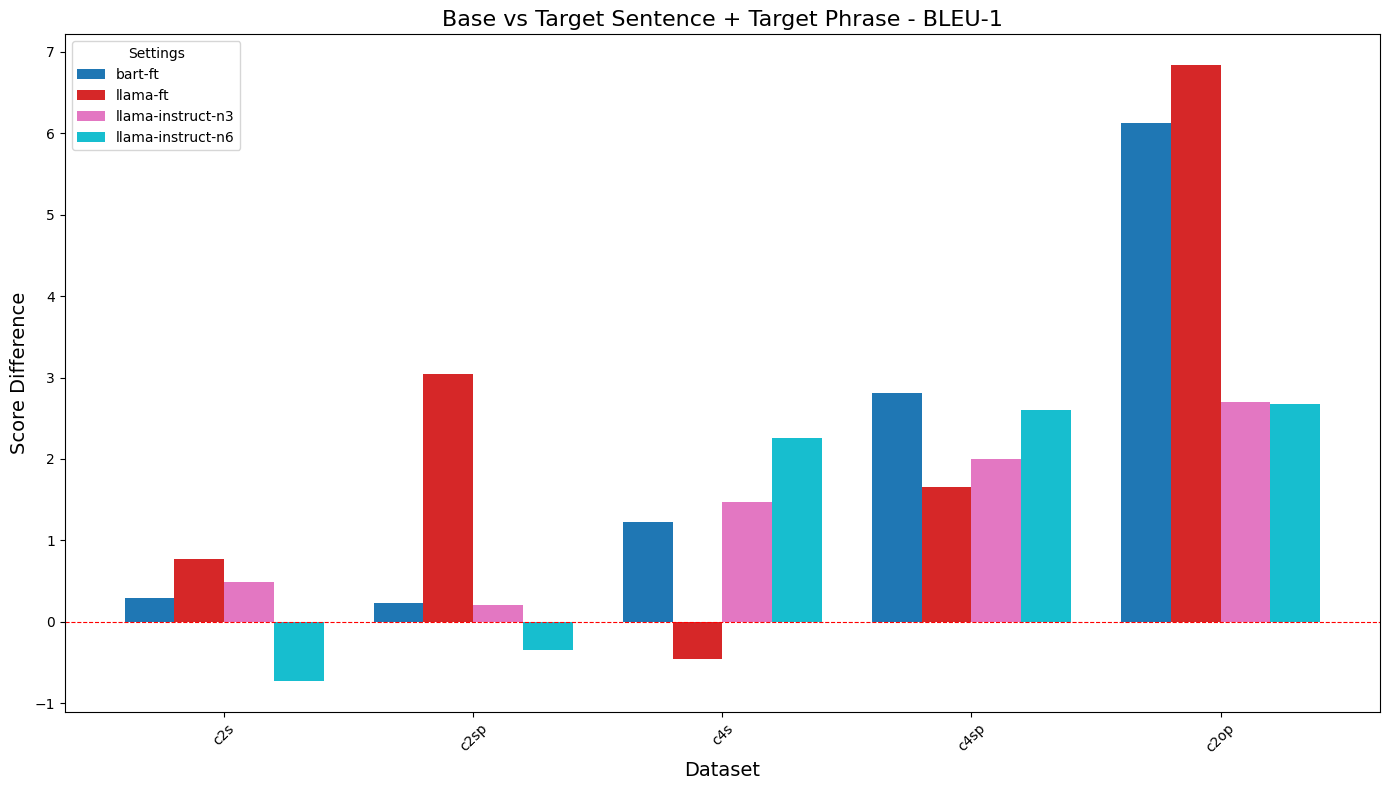

,dataset,bart-ft_base-b1,llama-ft_base-b1,llama-instr-few-shot_base-b1,llama-instr-few-shot_base-n3-b1,llama-instr-few-shot_base-n6-b1,bart-ft_target-sent-target-b1,llama-ft_target-sent-target-b1,llama-instr-few-shot_target-sent-target-n3-b1,llama-instr-few-shot_target-sent-target-n6-b1,Difference_bart-ft_target-sent-target-b1,Difference_llama-ft_target-sent-target-b1,Difference_llama-instr-few-shot_target-sent-target-n3-b1,Difference_llama-instr-few-shot_target-sent-target-n6-b1
0,c2s,20.127,22.070,15.899,16.599,16.284,20.415,22.842,16.780,15.557,0.288,0.772,0.496,-0.727
1,c2sp,19.784,20.439,15.266,15.888,16.451,20.012,23.476,16.656,16.112,0.228,3.037,0.205,-0.339
2,c4s,19.593,23.374,15.712,14.788,15.158,20.819,22.919,16.635,17.412,1.226,-0.455,1.477,2.254
3,c4sp,18.544,20.691,15.233,14.725,14.426,21.354,22.343,16.428,17.033,2.810,1.652,2.002,2.607
6,c2op,18.676,16.604,13.401,12.324,13.407,24.802,23.438,16.111,16.082,6.126,6.834,2.704,2.675


In [27]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "b1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"b1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"b1","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['target-sent-target'],  
    score_type='b1',
    title="Base vs Target Sentence + Target Phrase - BLEU-1",
    exclude_columns=["llama-instr-few-shot_target-sent-target-b1"]
)

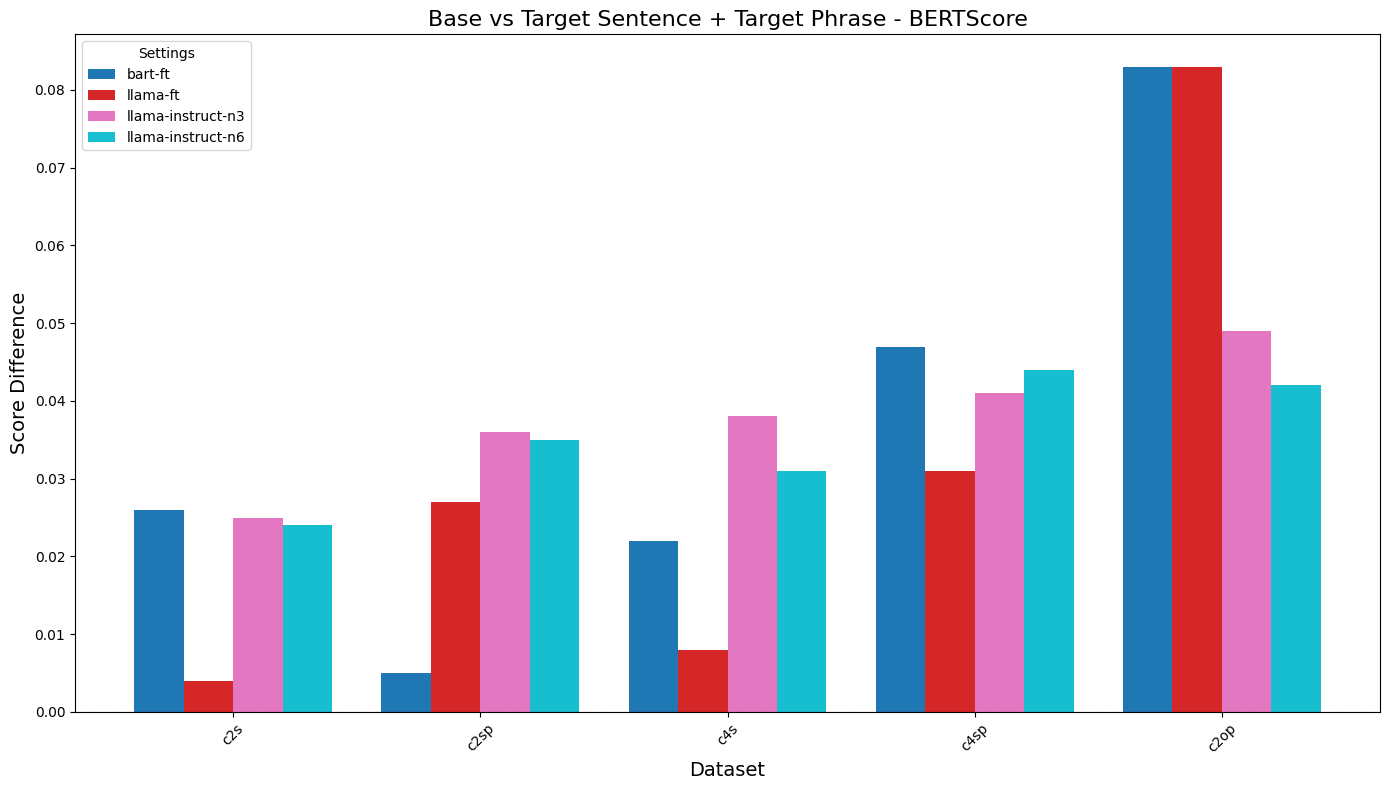

,dataset,bart-ft_base-bsf1,llama-ft_base-bsf1,llama-instr-few-shot_base-bsf1,llama-instr-few-shot_base-n3-bsf1,llama-instr-few-shot_base-n6-bsf1,bart-ft_target-sent-target-bsf1,llama-ft_target-sent-target-bsf1,llama-instr-few-shot_target-sent-target-n3-bsf1,llama-instr-few-shot_target-sent-target-n6-bsf1,Difference_bart-ft_target-sent-target-bsf1,Difference_llama-ft_target-sent-target-bsf1,Difference_llama-instr-few-shot_target-sent-target-n3-bsf1,Difference_llama-instr-few-shot_target-sent-target-n6-bsf1
0,c2s,0.468,0.501,0.475,0.453,0.450,0.494,0.505,0.475,0.474,0.026,0.004,0.025,0.024
1,c2sp,0.487,0.482,0.456,0.450,0.445,0.492,0.509,0.481,0.480,0.005,0.027,0.036,0.035
2,c4s,0.470,0.499,0.461,0.441,0.440,0.492,0.507,0.478,0.471,0.022,0.008,0.038,0.031
3,c4sp,0.470,0.479,0.447,0.436,0.432,0.517,0.510,0.473,0.476,0.047,0.031,0.041,0.044
6,c2op,0.449,0.435,0.433,0.424,0.428,0.532,0.518,0.477,0.470,0.083,0.083,0.049,0.042


In [97]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "bsf1", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bsf1", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bsf1","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['target-sent-target'],  
    score_type='bsf1',
    title="Base vs Target Sentence + Target Phrase - BERTScore",
    exclude_columns=["llama-instr-few-shot_target-sent-target-bsf1"]
)

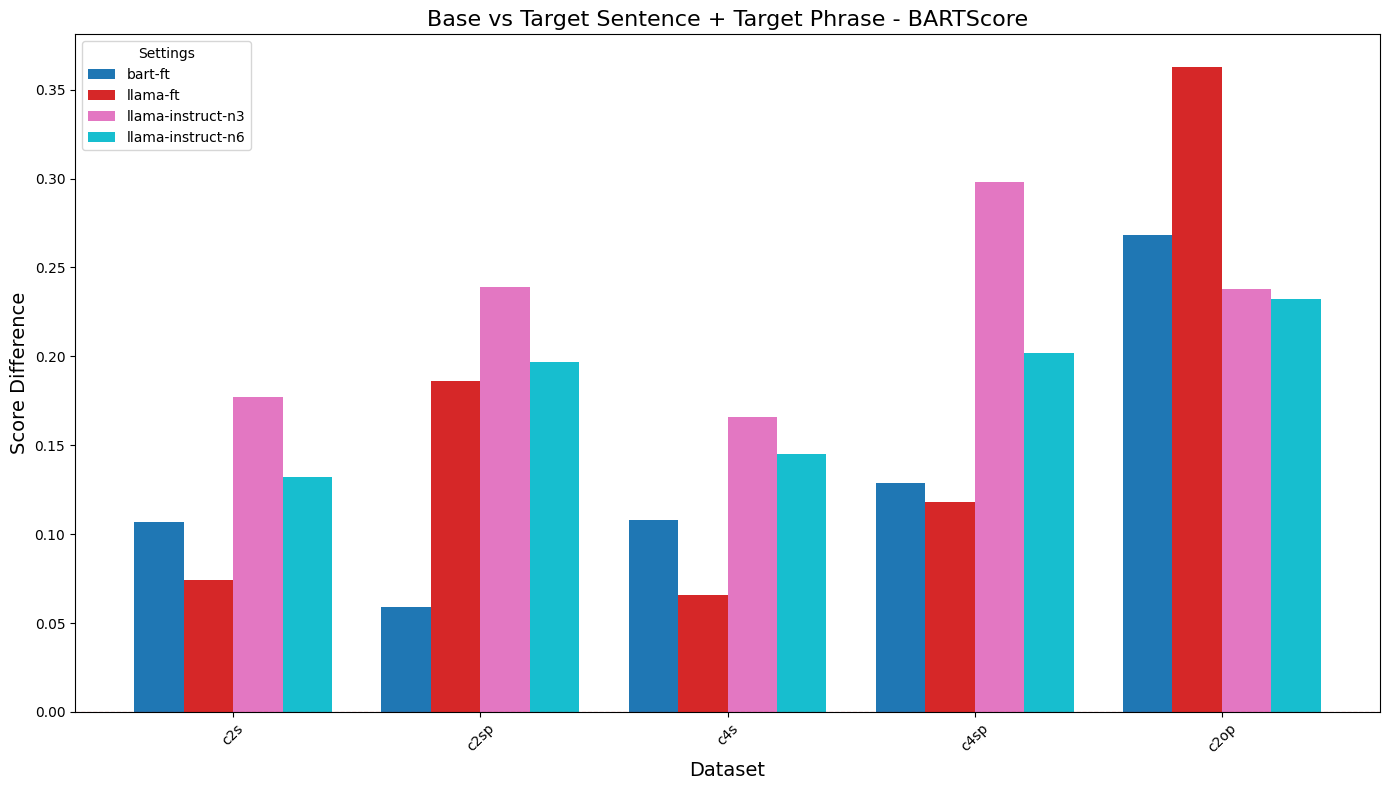

,dataset,bart-ft_base-bartscore,llama-ft_base-bartscore,llama-instr-few-shot_base-bartscore,llama-instr-few-shot_base-n3-bartscore,llama-instr-few-shot_base-n6-bartscore,bart-ft_target-sent-target-bartscore,llama-ft_target-sent-target-bartscore,llama-instr-few-shot_target-sent-target-n3-bartscore,llama-instr-few-shot_target-sent-target-n6-bartscore,Difference_bart-ft_target-sent-target-bartscore,Difference_llama-ft_target-sent-target-bartscore,Difference_llama-instr-few-shot_target-sent-target-n3-bartscore,Difference_llama-instr-few-shot_target-sent-target-n6-bartscore
0,c2s,-3.438,-3.328,-3.778,-3.875,-3.868,-3.331,-3.254,-3.691,-3.736,0.107,0.074,0.177,0.132
1,c2sp,-3.406,-3.393,-3.849,-3.904,-3.917,-3.347,-3.207,-3.678,-3.720,0.059,0.186,0.239,0.197
2,c4s,-3.395,-3.344,-3.884,-3.927,-3.918,-3.287,-3.278,-3.752,-3.773,0.108,0.066,0.166,0.145
3,c4sp,-3.386,-3.358,-3.941,-4.013,-3.968,-3.257,-3.240,-3.670,-3.766,0.129,0.118,0.298,0.202
6,c2op,-3.543,-3.579,-4.097,-4.162,-4.058,-3.275,-3.216,-3.820,-3.826,0.268,0.363,0.238,0.232


In [28]:
from display_utils import *
bart_ft_df = preprocess_dataframe(bart_ft_res, "bartscore", "bart-ft")
llama_ft_df = preprocess_dataframe(llama_ft_res,"bartscore", "llama-ft")
llama_instr_df = preprocess_dataframe(llama_instr_res,"bartscore","llama-instr-few-shot")
df = merge_dataframes([bart_ft_df,llama_ft_df,llama_instr_df])

compare_to_base(
    df=df,
    settings_to_compare=['target-sent-target'],  
    score_type='bartscore',
    title="Base vs Target Sentence + Target Phrase - BARTScore",
    exclude_columns=["llama-instr-few-shot_target-sent-target-bartscore"]
)

# Effectives of each setting for the Baseline Model - llama-ft 

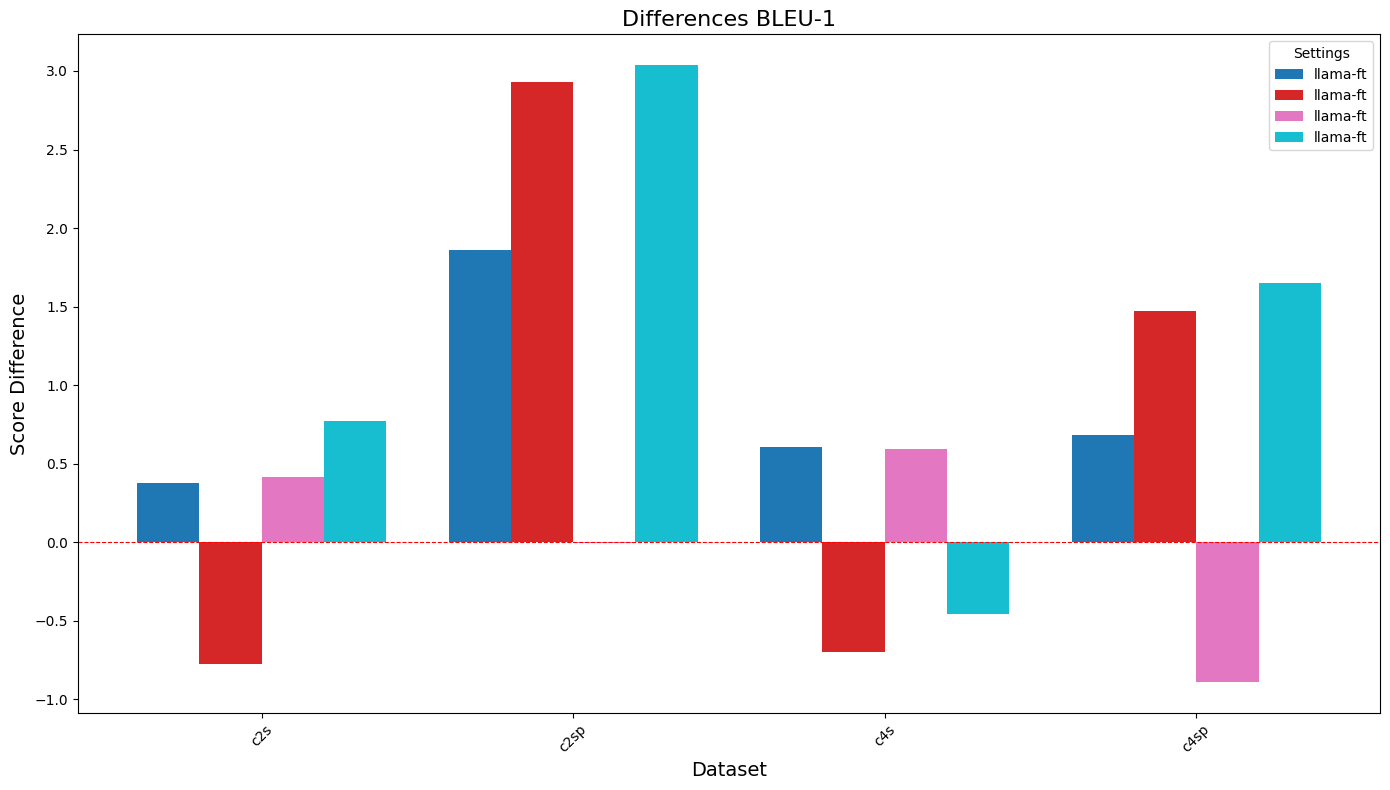

,dataset,llama-ft_base-b1,llama-ft_masked-b1,llama-ft_target-phrase-b1,llama-ft_target-sent-b1,llama-ft_target-sent-target-b1,Difference_llama-ft_masked-b1,Difference_llama-ft_target-phrase-b1,Difference_llama-ft_target-sent-b1,Difference_llama-ft_target-sent-target-b1
0,c2s,22.070,22.447,21.292,22.484,22.842,0.377,-0.778,0.414,0.772
1,c2sp,20.439,22.299,23.367,20.432,23.476,1.860,2.928,-0.007,3.037
2,c4s,23.374,23.978,22.673,23.968,22.919,0.604,-0.701,0.594,-0.455
3,c4sp,20.691,21.377,22.161,19.801,22.343,0.686,1.470,-0.890,1.652


In [29]:
from display_utils import *

llama_ft_df = preprocess_dataframe(llama_ft_res,"b1", "llama-ft")

compare_to_base(
    df=llama_ft_df,
    settings_to_compare=['masked','target-phrase','target-sent','target-sent-target'],  
    score_type='b1',
    title="Differences BLEU-1",
)

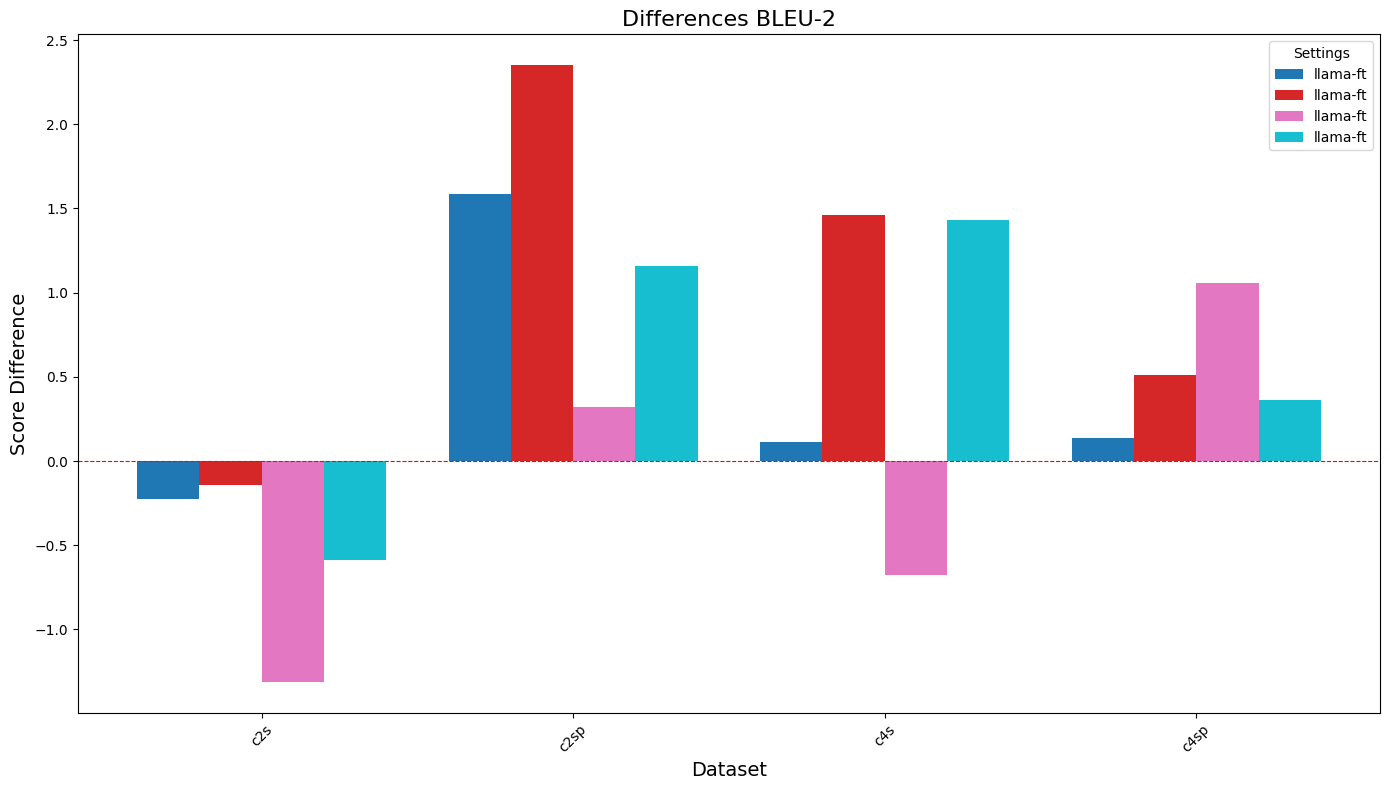

,dataset,llama-ft_base-b2,llama-ft_masked-b2,llama-ft_target-phrase-b2,llama-ft_target-sent-b2,llama-ft_target-sent-target-b2,Difference_llama-ft_masked-b2,Difference_llama-ft_target-phrase-b2,Difference_llama-ft_target-sent-b2,Difference_llama-ft_target-sent-target-b2
0,c2s,9.862,9.638,9.721,8.549,9.273,-0.224,-0.141,-1.313,-0.589
1,c2sp,8.020,9.604,10.371,8.340,9.176,1.584,2.351,0.320,1.156
2,c4s,9.504,9.615,10.968,8.827,10.933,0.111,1.464,-0.677,1.429
3,c4sp,8.296,8.435,8.809,9.351,8.659,0.139,0.513,1.055,0.363


In [9]:
from display_utils import *

llama_ft_df = preprocess_dataframe(llama_ft_res,"b2", "llama-ft")

compare_to_base(
    df=llama_ft_df,
    settings_to_compare=['masked','target-phrase','target-sent','target-sent-target'],  
    score_type='b2',
    title="Differences BLEU-2",
)

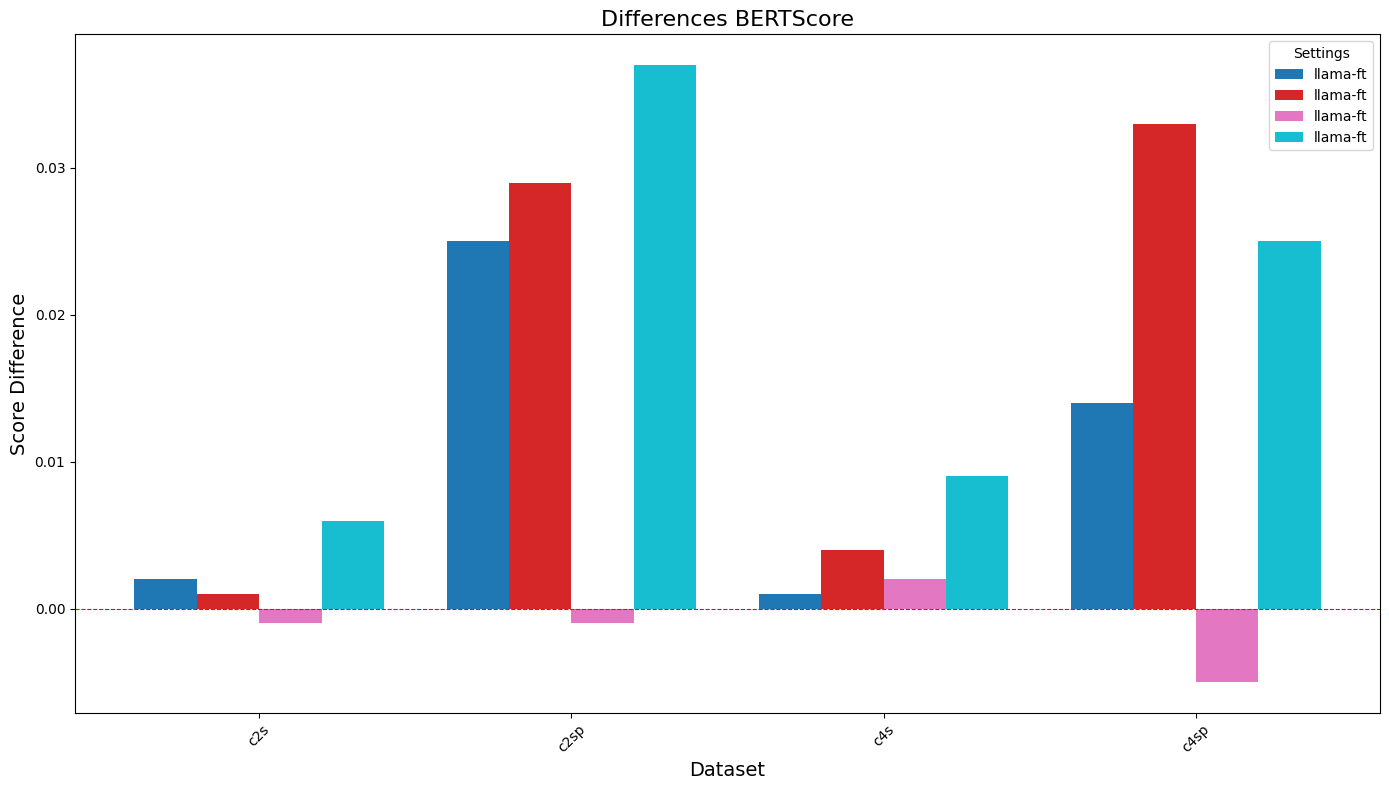

,dataset,llama-ft_base-bsf1,llama-ft_masked-bsf1,llama-ft_target-phrase-bsf1,llama-ft_target-sent-bsf1,llama-ft_target-sent-target-bsf1,Difference_llama-ft_masked-bsf1,Difference_llama-ft_target-phrase-bsf1,Difference_llama-ft_target-sent-bsf1,Difference_llama-ft_target-sent-target-bsf1
0,c2s,0.501,0.503,0.502,0.500,0.507,0.002,0.001,-0.001,0.006
1,c2sp,0.482,0.507,0.511,0.481,0.519,0.025,0.029,-0.001,0.037
2,c4s,0.499,0.500,0.503,0.501,0.508,0.001,0.004,0.002,0.009
3,c4sp,0.479,0.493,0.512,0.474,0.504,0.014,0.033,-0.005,0.025


In [30]:
from display_utils import *

llama_ft_df = preprocess_dataframe(llama_ft_res,"bsf1", "llama-ft")

compare_to_base(
    df=llama_ft_df,
    settings_to_compare=['masked','target-phrase','target-sent','target-sent-target'],  
    score_type='bsf1',
    title="Differences BERTScore",
)

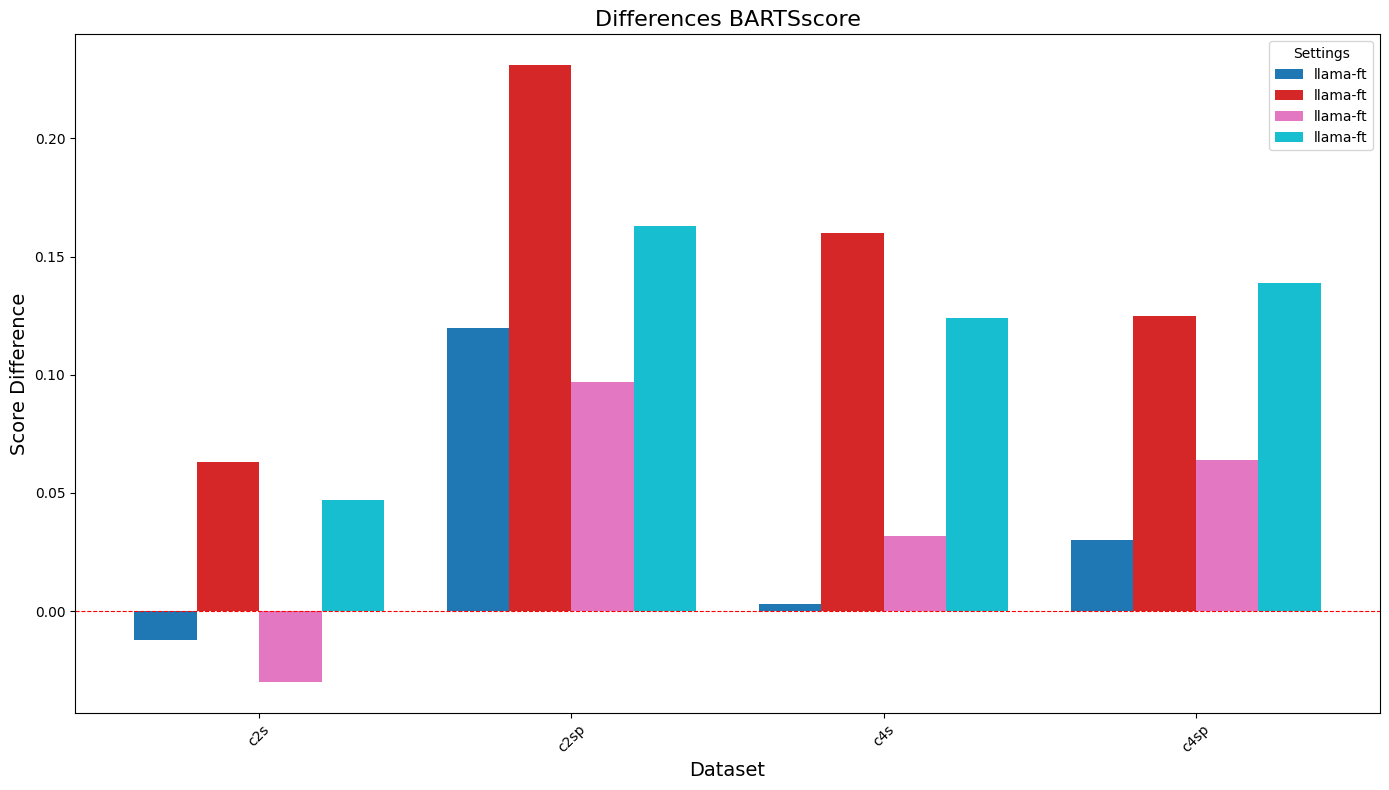

,dataset,llama-ft_base-bartscore,llama-ft_masked-bartscore,llama-ft_target-phrase-bartscore,llama-ft_target-sent-bartscore,llama-ft_target-sent-target-bartscore,Difference_llama-ft_masked-bartscore,Difference_llama-ft_target-phrase-bartscore,Difference_llama-ft_target-sent-bartscore,Difference_llama-ft_target-sent-target-bartscore
0,c2s,-3.328,-3.340,-3.265,-3.358,-3.281,-0.012,0.063,-0.030,0.047
1,c2sp,-3.393,-3.273,-3.162,-3.296,-3.230,0.120,0.231,0.097,0.163
2,c4s,-3.344,-3.341,-3.184,-3.312,-3.220,0.003,0.160,0.032,0.124
3,c4sp,-3.358,-3.328,-3.233,-3.294,-3.219,0.030,0.125,0.064,0.139


In [12]:
from display_utils import *

llama_ft_df = preprocess_dataframe(llama_ft_res,"bartscore", "llama-ft")

compare_to_base(
    df=llama_ft_df,
    settings_to_compare=['masked','target-phrase','target-sent','target-sent-target'],  
    score_type='bartscore',
    title="Differences BARTSscore",
)